<a href="https://colab.research.google.com/github/phmouras/Critical-Phenomena-in-gravitational-collapse-via-spectral-methods/blob/main/Origin_MSSC_N500_filter_Potential_working.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

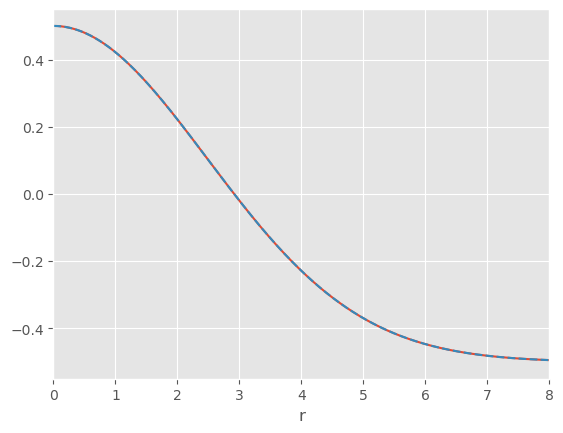

In [1]:
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import math
%matplotlib inline
mpl.style.use('ggplot')


N = 300                                                   # Truncation ordem

L0 = 15                                             # Map parameter

col = np.cos(np.arange(2*N + 3)*math.pi /(2*N + 2))      # collocation points (Verificado)

colr = col[1:N+2]                                                         # physical domain (Verificado)

r1 = L0 * colr/(np.sqrt(1-colr**2))
r = np.flip(r1)                                           # physical domain (Verificado)

#out_r = open('r_30_L02.txt', 'a')
#out_r.write(' ' +' '.join(str('%.18f'%n) for n in r)+'\n')
#out_r.close()


# Base Matrix (Tchebyshev Polinomials):

SB = np.zeros([N+2,N+1])
rSB = np.zeros([N+2,N+1])
rrSB = np.zeros([N+2,N+1])


for i in range(N+1+1):                                    # SB[:,0] = function in origin
  SB[i,] = np.sin((2*i+1)*np.arctan(L0/r))

for i in range(N+1+1):
  rSB[i,] = -np.cos((2*i+1)*np.arctan(L0/r))*(2*i+1)*L0/(r**2*(1+L0**2/r**2))

for i in range(N+1+1):
  rrSB[i,] = -np.sin((2*i+1)*np.arctan(L0/r))*(2*i+1)**2*L0**2/(r**4*(1+L0**2/r**2)**2)+2*np.cos((2*i+1)*np.arctan(L0/r))*(2*i+1)*L0/(r**3*(1+L0**2/r**2))-2*np.cos((2*i+1)*np.arctan(L0/r))*(2*i+1)*L0**3/(r**5*(1+L0**2/r**2)**2)

# Base function



psi = SB[0:N+1,:]        # origin included in psi[:,0]
rpsi = rSB[0:N+1,:]
rrpsi = rrSB[0:N+1,:]



# Initial conditions of Phi (Scalar field)

#r0 = 0

#sigma = 1/2

# L0 = 1 and sigma = 1/2 and Phi_init = A0*(np.exp(-(r-r0)**2/sigma**2) + np.exp(-(r+r0)**2/sigma**2))

#A0 =  0.76  #  0.7602785  -> disperse ;  # 0.77 -> colapse

# L0 = 3 and sigma = 1/2 and Phi_init = A0*(np.exp(-(r-r0)**2/sigma**2) + np.exp(-(r+r0)**2/sigma**2))

#A0 =  0.75981136951800  #  0.759811369518  -> disperse ;  # 0.759811369518001   -> colapse

Phi_c = 1/2

Phi_vac = -1/2

R0 = 3.5  # 0.05 -> disperse ;  # 0.  -> colapse   A0 substitution

Phi_init = (Phi_c - Phi_vac)*np.exp(-r**2/R0**2) + Phi_vac          # Phi initial data out of origin (Verificado)

inv_psi = np.linalg.inv(psi)

a0 = np.dot(Phi_init, inv_psi)  # coeficients a(0)  (Verificado)

#out_a = open('a0_30_L02.txt', 'a')
#out_a.write(' ' +' '.join(str('%.18f'%n) for n in a0)+'\n')
#out_a.close()


Phi = np.dot(a0, psi)        # approximative solution in t = 0
rPhi= np.dot(a0, rpsi)

########################### Plot: Initial Conditions of Phi

M = 3000       # plot truncation

rplot = np.linspace(0.00000000000000001,15,M)

colplot = rplot/np.sqrt(L0**2 + rplot**2)

SBplot = np.zeros([N+1,M])
rSBplot = np.zeros([N+1,M])
rrSBplot = np.zeros([N+1,M])

for i in range(N+1):
  SBplot[i,] = np.sin((2*i+1)*np.arctan(L0/rplot))

for i in range(N+1):
  rSBplot[i,] = -np.cos((2*i+1)*np.arctan(L0/rplot))*(2*i+1)*L0/(rplot**2*(1+L0**2/rplot**2))

for i in range(N+1):
  rrSBplot[i,] = -np.sin((2*i+1)*np.arctan(L0/rplot))*(2*i+1)**2*L0**2/(rplot**4*(1+L0**2/rplot**2)**2)+2*np.cos((2*i+1)*np.arctan(L0/rplot))*(2*i+1)*L0/(rplot**3*(1+L0**2/rplot**2))-2*np.cos((2*i+1)*np.arctan(L0/rplot))*(2*i+1)*L0**3/(rplot**5*(1+L0**2/rplot**2)**2)

psiplot = SBplot[0:(N+1),:]
rpsiplot = rSBplot[0:(N+1),:]
rrpsiplot = rrSBplot[0:(N+1),:]

Phiplot_init = (Phi_c - Phi_vac)*np.exp(-rplot**2/R0**2) + Phi_vac

#Phiplot_init = np.hstack((0, Phiplot_int))

Phiplot = np.dot(a0, psiplot)

plt.plot(rplot, Phiplot, rplot, Phiplot_init, "--")   #(Verificado)
plt.xlabel('r')
plt.xlim(0,8)
plt.show()


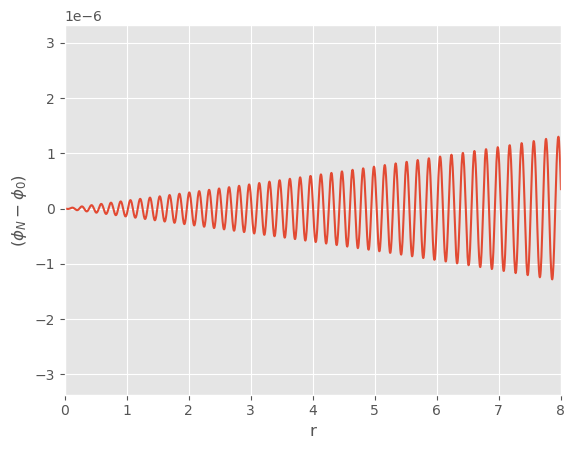

In [2]:
erro = Phiplot_init - Phiplot

plt.plot(rplot, erro)
plt.xlabel('r')
plt.xlim(0,8)
plt.ylabel("$(\phi_N - \phi_0)$")
plt.show()

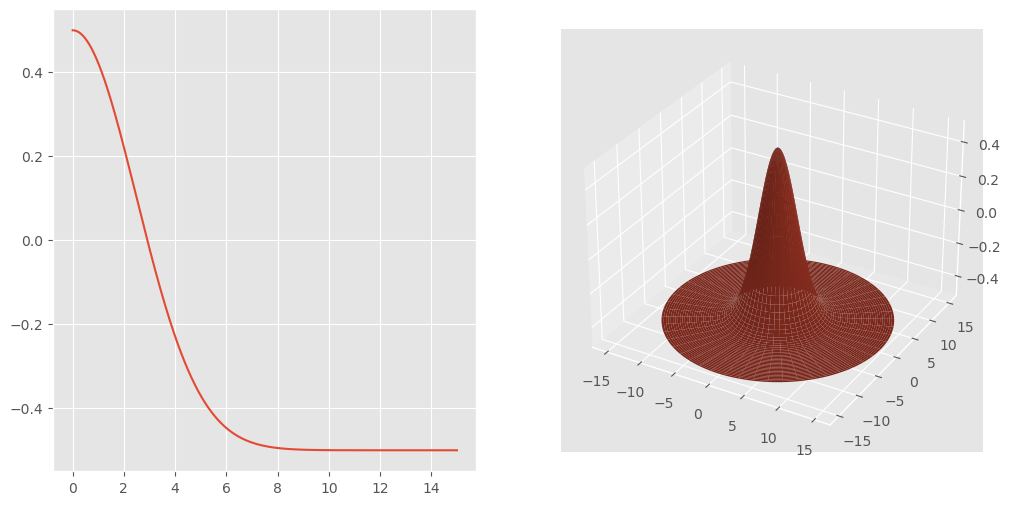

In [3]:

# Plot 3D from Phi initial:
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure(figsize=(12,6))
ax1 = fig.add_subplot(121)
ax2 = fig.add_subplot(122,projection='3d')

y = Phiplot
x = rplot
theta = np.linspace(0, 2*np.pi, M)    # Revolution of f(phi,r)

xn = np.outer(x, np.cos(theta))
yn = np.outer(x, np.sin(theta))
zn = np.zeros_like(xn)

for i in range(len(x)):
    zn[i,:] = np.full_like(zn[0], y[i])

ax1.plot(x, y)
ax2.plot_surface(xn, yn, zn)
plt.show()

In [4]:
Pi_0 = np.zeros(N+1)
b0 = np.dot(Pi_0, psi)
Pi = np.dot(b0, psi)

c0 = np.zeros([N+1])     # guess value
for i in range(N+1):
  c0[i] = 0.0001

def V(Phi):
  return 1/4*(Phi**2 - Phi_vac**2)**2

def dV(Phi):
  return Phi**3 - Phi_vac**2*Phi


coeforigin = 1/L0**2*(-(-1)**(np.arange(N+1))*(2*np.arange(1,N+2)-1)**2)    # 1/r * d\phi/dr

tol = 1e-18
#cnew = 0
#err = abs(c0 - cnew)

n = 0
nf = 500

# Newton Raphson loop
#while max(err) >= tol:
while n <= nf:
  Chi = np.dot(c0, psi)
  rChi = np.dot(c0 ,rpsi)
  rrChi = np.dot(c0, rrpsi)
  H0_0 = 4*rrChi[0] + 8*np.dot(coeforigin,c0) + 1/2*rPhi[0]**2 + np.exp(4*Chi[0])*V(Phi)[0]
  H0_int = 4*rChi[1:N+1]**2 + 4*rrChi[1:N+1] + 8/r[1:N+1]*rChi[1:N+1] + 1/2*rPhi[1:N+1]**2 + np.exp(4*Chi[1:N+1])*V(Phi)[1:N+1]
  H0 = np.hstack((H0_0, H0_int))
  J1 = rChi*rpsi
  JH_0 = 8*J1[:,0]+ 4*rrpsi[:,0] + 8*coeforigin + 4*np.exp(4*Chi[0])*rpsi[:,0]*V(Phi)[0]
  JH_int = 8*J1[:,1:N+1] + 4*rrpsi[:,1:N+1] + 8/r[1:N+1]*rpsi[:,1:N+1] + 4*np.exp(4*Chi[1:N+1])*rpsi[:,1:N+1]*V(Phi)[1:N+1]
  JH = np.column_stack((JH_0, JH_int))
  inv_JH = np.linalg.inv(JH)
  cnew = c0
  c0 = c0 - np.dot(H0, inv_JH)
  err = abs(c0 - cnew)
  if  max(err) <= tol:
    print('n=', n, 'Erro_max=', max(err), 'c0=', c0, sep = '\n')

    break
  else:
    n = n + 1


n=
205
Erro_max=
4.336808689942018e-19
c0=
[ 7.93052326e-02 -2.52331495e-02  1.44889128e-02 -4.36931655e-03
  2.45000535e-03  9.46885664e-04 -3.50032722e-04  1.53346111e-03
 -3.85774400e-04  9.77887174e-04  2.12479054e-05  5.01813318e-04
  2.40620724e-04  2.87608776e-04  2.78740813e-04  2.20822733e-04
  2.48989649e-04  2.00211203e-04  2.12949433e-04  1.86325858e-04
  1.85789604e-04  1.71852805e-04  1.66279924e-04  1.57675149e-04
  1.51314482e-04  1.44852948e-04  1.39035222e-04  1.33632992e-04
  1.28558264e-04  1.23865489e-04  1.19443422e-04  1.15314382e-04
  1.11425624e-04  1.07766996e-04  1.04315608e-04  1.01053261e-04
  9.79666725e-05  9.50396973e-05  9.22617899e-05  8.96204661e-05
  8.71065278e-05  8.47103662e-05  8.24240312e-05  8.02398897e-05
  7.81511987e-05  7.61517127e-05  7.42357573e-05  7.23981241e-05
  7.06340323e-05  6.89390886e-05  6.73092438e-05  6.57407626e-05
  6.42301932e-05  6.27743395e-05  6.13702400e-05  6.00151443e-05
  5.87064966e-05  5.74419169e-05  5.62191878e-0

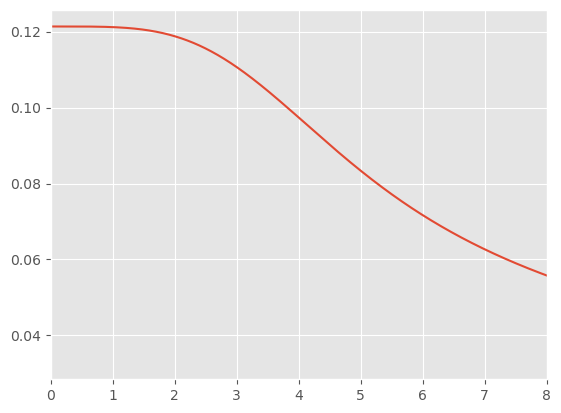

In [5]:

Chiplot = np.dot(c0, psiplot)


plt.plot(rplot,Chiplot)
plt.xlim(0,8)
plt.show()


In [6]:
# Equation for Krr: momentum constraint

# Initial values of Krr: Base functions of Krr

# In r = 0:

SB1 = 1/2*(SB[1:(N+1),:] + SB[0:(N),:])          # VERIFICADO
rSB1 = 1/2*(rSB[1:(N+1),:] + rSB[0:(N),:])
rrSB1 = 1/2*(rrSB[1:(N+1),:] + rrSB[0:(N),:])

# Base functions for Beta

SB2 = np.zeros([N,N+1])
rSB2 = np.zeros([N,N+1])
rrSB2 = np.zeros([N,N+1])



for i in range(N):                                                   # VERIFICADO
  SB2[i,] = np.sin((2*(i+1/2)+1)*np.arctan(L0/r))


for i in range(N):
  rSB2[i,] = -np.cos((2*i+2)*np.arctan(L0/r))*(2*i+2)*L0/(r**2*(1+L0**2/r**2))


for i in range(N):
  rrSB2[i,] = -np.sin((2*i+2)*np.arctan(L0/r))*(2*i+2)**2*L0**2/(r**4*(1+L0**2/r**2)**2)+2*np.cos((2*i+2)*np.arctan(L0/r))*(2*i+2)*L0/(r**3*(1+L0**2/r**2))-2*np.cos((2*i+2)*np.arctan(L0/r))*(2*i+2)*L0**3/(r**5*(1+L0**2/r**2)**2)






In [7]:
np.shape(SB2)

(300, 301)

In [8]:
np.shape(SB1)

(300, 301)

In [9]:
c0

array([ 7.93052326e-02, -2.52331495e-02,  1.44889128e-02, -4.36931655e-03,
        2.45000535e-03,  9.46885664e-04, -3.50032722e-04,  1.53346111e-03,
       -3.85774400e-04,  9.77887174e-04,  2.12479054e-05,  5.01813318e-04,
        2.40620724e-04,  2.87608776e-04,  2.78740813e-04,  2.20822733e-04,
        2.48989649e-04,  2.00211203e-04,  2.12949433e-04,  1.86325858e-04,
        1.85789604e-04,  1.71852805e-04,  1.66279924e-04,  1.57675149e-04,
        1.51314482e-04,  1.44852948e-04,  1.39035222e-04,  1.33632992e-04,
        1.28558264e-04,  1.23865489e-04,  1.19443422e-04,  1.15314382e-04,
        1.11425624e-04,  1.07766996e-04,  1.04315608e-04,  1.01053261e-04,
        9.79666725e-05,  9.50396973e-05,  9.22617899e-05,  8.96204661e-05,
        8.71065278e-05,  8.47103662e-05,  8.24240312e-05,  8.02398897e-05,
        7.81511987e-05,  7.61517127e-05,  7.42357573e-05,  7.23981241e-05,
        7.06340323e-05,  6.89390886e-05,  6.73092438e-05,  6.57407626e-05,
        6.42301932e-05,  

In [10]:
Nq = int(3/2*N)           # Quadrature truncation

gauss_quadrature = np.polynomial.legendre.leggauss(Nq + 1)

new_col = gauss_quadrature[0]            # Legendre quadrature points


# Legendre Polinomials

P = np.zeros([Nq+3,Nq+1])
colP = np.zeros([Nq+3,Nq+1])

P[0,] = 1
P[1,] = new_col

colP[0,] = 0
colP[1,] = 1

for i in range(2,Nq+3):
  P[i,] = ((2*i-1)*new_col*P[i-1,] - (i-1)*P[i-2,])/(i)

for i in range(2,Nq+3):
  colP[i,] = i*P[i-1] + new_col*colP[i-1]

P_max = P[Nq+1]

colP_max = colP[Nq+1]

wq_col = 2/((1-new_col**2)*colP_max**2)    # Legendre weight (Verificado)

rq = L0*(1+new_col)/(1-new_col)            # Physical quadrature domain

qSB = np.zeros([Nq+1,Nq+1])
qrSB = np.zeros([Nq+1,Nq+1])
qrrSB = np.zeros([Nq+1,Nq+1])


for i in range(Nq+1):
  qSB[i,] = np.sin((2*i+1)*np.arctan(L0/rq))

for i in range(Nq+1):
  qrSB[i,] = -np.cos((2*i+1)*np.arctan(L0/rq))*(2*i+1)*L0/(rq**2*+L0**2)

for i in range(Nq+1):
  qrrSB[i,] = -np.sin((2*i+1)*np.arctan(L0/rq))*(2*i+1)**2*L0**2/(rq**4*(1+L0**2/rq**2)**2)+2*np.cos((2*i+1)*np.arctan(L0/rq))*(2*i+1)*L0/(rq**3*(1+L0**2/rq**2))-2*np.cos((2*i+1)*np.arctan(L0/rq))*(2*i+1)*L0**3/(rq**5*(1+L0**2/rq**2)**2)

qpsi = qSB[0:N+1,:]
rqpsi = qrSB[0:N+1,:]
rrqpsi = qrrSB[0:N+1,:]


qSB1 = 1/2*(qSB[1:(N+1),:] + qSB[0:(N),:])          # VERIFICADO
rqSB1 = 1/2*(qrSB[1:(N+1),:] + qrSB[0:(N),:])
rrqSB1 = 1/2*(qSB[1:(N+1),:] + qrrSB[0:(N),:])



# Initial Phi in quadrature points

#qPhi = np.dot(a0, qpsi)
#rqPhi= np.dot(a0, rqpsi)

# Initial Pi for quadrature points

#qPi = np.dot(b0, qpsi)


# Initial Chi for quadrature points:

#qChi = np.dot(c0, qpsi)   # Verificado todos
#rqChi = np.dot(c0, rqpsi)
#rrqChi = np.dot(c0, rrqpsi)

# Initial values of Krr:

#qKrr = np.dot(ck0, qSB1)

# Alpha na origem

#Alphacenter = (-1)**(np.arange(N+1))


In [11]:
# Filtering

Nc = 0

Nf = N - Nc

coef_f = 36
s = 30

filter1 = np.ones(N+1)
#filter2 = np.ones(N)
#filter1 = np.hstack((np.ones(Nc),np.exp(- coef_f*((np.arange(N - Nc + 1))/(N-Nc))**s)))
#filter1 = np.exp(- coef_f*((np.arange(N - Nc + 1))/(N-Nc))**s)

In [ ]:
# Runge Kutta 4th order

h = 0.0002   # step size
tf = 400

It = int(tf/h)

#t1 = np.linspace(0, tf, It)

t = 0

Madm = []
Alpha_origin = []
phi_origin = []
L2HC = []
phi_set = []

out_a = open('Alpha_origin.txt', 'a')
out_a.truncate(0)                        # arase the old datas and start the new ones

out_p = open('phi_origin.txt', 'a')
out_p.truncate(0)


M0 = 2*np.dot(np.arange(1, 2*N + 2, 2), c0) # Madm(t = 0)


#matriz = np.concatenate((array1, array2))

while t <= tf:

  # First step
  Phi = np.dot(a0, psi)
  rPhi = np.dot(a0, rpsi)
  rrPhi = np.dot(a0, rrpsi)
  Pi = np.dot(b0, psi)
  rPi= np.dot(b0, rpsi)
  Chi = np.dot(c0, psi)
  rChi = np.dot(c0, rpsi)
  rrChi = np.dot(c0, rrpsi)
  Matrix_Krr = 2*rChi[1:N+1]*SB1[:,1:N+1] + rSB1[:,1:N+1] + 3/r[1:N+1]*SB1[:,1:N+1]   # (p, p)
  inv_matrix_krr = np.linalg.inv(Matrix_Krr)
  rhsk = - Pi[1:N+1]*rPhi[1:N+1]*np.exp(4*Chi[1:N+1]) # (p,)
  ck0 = np.dot(rhsk, inv_matrix_krr)  # (p,)
  Krr = np.dot(ck0, SB1)              # (p+1,)
  rKrr = np.dot(ck0, rSB1)
  Matrix_Alpha_0 = rrpsi[:,0] + 2*coeforigin - np.exp(4*Chi[0])*(Pi[0]**2 - V(Phi)[0])*psi[:,0]
  Matrix_Alpha_int = rrpsi[:,1:N+1] + 2*(1/r[1:N+1] + rChi[1:N+1])*rpsi[:,1:N+1] - 3/2*np.exp(-4*Chi[1:N+1])*Krr[1:N+1]**2*psi[:,1:N+1]  - np.exp(4*Chi[1:N+1])*(Pi[1:N+1]**2 - V(Phi)[1:N+1])*psi[:,1:N+1]
  Matrix_Alpha = np.column_stack((Matrix_Alpha_0, Matrix_Alpha_int))
  inv_matrix_alpha = np.linalg.inv(Matrix_Alpha)
  rhsal = 3/2*np.exp(-4*Chi)*Krr**2 + np.exp(4*Chi)*(Pi**2-V(Phi))
  al0 = np.dot(rhsal, inv_matrix_alpha)
  Alpha = 1 + np.dot(al0, psi)
  rAlpha = np.dot(al0, rpsi)
  rrAlpha = np.dot(al0, rrpsi)
  Matrix_Beta = rSB2[:,1:N+1] - SB2[:,1:N+1]/r[1:N+1]
  inv_matrix_beta = np.linalg.inv(Matrix_Beta)
  rhsbe = 3/2*Alpha[1:N+1]*np.exp(-4*Chi[1:N+1])*Krr[1:N+1]
  be0 = np.dot(rhsbe , inv_matrix_beta)
  Beta = np.dot(be0, SB2)
  rBeta = np.dot(be0, rSB2)
  db_origin = 2*np.exp(-4*Chi[0])*Alpha[0]*np.dot(a0, coeforigin) + np.exp(-4*Chi[0])*Alpha[0]*rrPhi[0] - Alpha[0]*dV(Phi)[0]
  db_int = Beta[1:N+1]*rPi[1:N+1] + np.exp(-4*Chi[1:N+1])*(2*Alpha[1:N+1]/r[1:N+1] + rAlpha[1:N+1] + 2*rChi[1:N+1]*Alpha[1:N+1])*rPhi[1:N+1] + np.exp(-4*Chi[1:N+1])*Alpha[1:N+1]*rrPhi[1:N+1] - Alpha[1:N+1]*dV(Phi)[1:N+1]
  db = np.dot(np.hstack((db_origin, db_int)), inv_psi)
  dc = np.dot(Beta*rChi + rBeta/2 - Alpha/2*np.exp(-4*Chi)*Krr, inv_psi)
  da = np.dot(Alpha*Pi + Beta*rPhi, inv_psi)
  K1 = h*(dc)
  L1 = h*(da)
  N1 = h*(db)

  # L2-error associated to the Hamiltonian constraint
  qPhi = np.dot(a0, qpsi)
  rqPhi= np.dot(a0, rqpsi)
  qPi = np.dot(b0, qpsi)
  qChi = np.dot(c0, qpsi)
  rqChi = np.dot(c0, rqpsi)
  rrqChi = np.dot(c0, rrqpsi)
  qKrr = np.dot(ck0, qSB1)
  H = 4*rqChi**2 + 4*rrqChi + 8*rqChi/rq + 3/4*np.exp(-4*qChi)*qKrr**2 + np.exp(4*qChi)*(1/2*qPi**2 + np.exp(-4*qChi)/2*rqPhi**2)   # Hamiltonian constraint (HC)
  L2HC.append((1/2*np.dot(H**2,wq_col))**1/2)    # L2 error of HC

  # Alpha origin
  Alpha_0 = 1 + np.dot(al0, psi[:,0])
  Alpha_origin.append(Alpha_0)                   # = Alphacenter in matlab
  out_a.write(str(t) + " " + str(Alpha_0))
  out_a.write(',\n')

  # Phi origin:
  phi_0 = np.dot(a0, psi[:,0])
  phi_origin.append(phi_0)
  out_p.write(str(t) + " " + str(phi_0))
  out_p.write(',\n')

  # ADM mass:
  Madm.append(2*np.dot(np.arange(1, 2*N + 2, 2), c0))

  # Second step
  Phi = np.dot(a0 + L1/2, psi)
  rPhi= np.dot(a0 + L1/2 , rpsi)
  rrPhi = np.dot(a0 + L1/2, rrpsi)
  Pi = np.dot(b0 + N1/2, psi)
  rPi= np.dot(b0 + N1/2, rpsi)
  Chi = np.dot(c0 + K1/2, psi)
  rChi = np.dot(c0 + K1/2, rpsi)
  rrChi = np.dot(c0 + K1/2, rrpsi)
  Matrix_Krr = 2*rChi[1:N+1]*SB1[:,1:N+1] + rSB1[:,1:N+1] + 3/r[1:N+1]*SB1[:,1:N+1]   # (p, p)
  inv_matrix_krr = np.linalg.inv(Matrix_Krr)
  rhsk = - Pi[1:N+1]*rPhi[1:N+1]*np.exp(4*Chi[1:N+1]) # (p,)
  ck0 = np.dot(rhsk, inv_matrix_krr)  # (p,)
  Krr = np.dot(ck0, SB1)              # (p+1,)
  rKrr = np.dot(ck0, rSB1)
  Matrix_Alpha_0 = rrpsi[:,0] + 2*coeforigin - np.exp(4*Chi[0])*(Pi[0]**2 - V(Phi)[0])*psi[:,0]
  Matrix_Alpha_int = rrpsi[:,1:N+1] + 2*(1/r[1:N+1] + rChi[1:N+1])*rpsi[:,1:N+1] - 3/2*np.exp(-4*Chi[1:N+1])*Krr[1:N+1]**2*psi[:,1:N+1] - np.exp(4*Chi[1:N+1])*(Pi[1:N+1]**2 - V(Phi)[1:N+1])*psi[:,1:N+1]
  Matrix_Alpha = np.column_stack((Matrix_Alpha_0, Matrix_Alpha_int))
  inv_matrix_alpha = np.linalg.inv(Matrix_Alpha)
  rhsal = 3/2*np.exp(-4*Chi)*Krr**2 + np.exp(4*Chi)*(Pi**2-V(Phi))
  al0 = np.dot(rhsal, inv_matrix_alpha)
  Alpha = 1 + np.dot(al0, psi)
  rAlpha = np.dot(al0, rpsi)
  rrAlpha = np.dot(al0, rrpsi)
  Matrix_Beta = rSB2[:,1:N+1] - SB2[:,1:N+1]/r[1:N+1]
  inv_matrix_beta = np.linalg.inv(Matrix_Beta)
  rhsbe = 3/2*Alpha[1:N+1]*np.exp(-4*Chi[1:N+1])*Krr[1:N+1]
  be0 = np.dot(rhsbe , inv_matrix_beta)
  Beta = np.dot(be0, SB2)
  rBeta = np.dot(be0, rSB2)
  db_origin = 2*np.exp(-4*Chi[0])*Alpha[0]*np.dot(a0, coeforigin) + np.exp(-4*Chi[0])*Alpha[0]*rrPhi[0] - Alpha[0]*dV(Phi)[0]
  db_int = Beta[1:N+1]*rPi[1:N+1] + np.exp(-4*Chi[1:N+1])*(2*Alpha[1:N+1]/r[1:N+1] + rAlpha[1:N+1] + 2*rChi[1:N+1]*Alpha[1:N+1])*rPhi[1:N+1] + np.exp(-4*Chi[1:N+1])*Alpha[1:N+1]*rrPhi[1:N+1] - Alpha[1:N+1]*dV(Phi)[1:N+1]
  db = np.dot(np.hstack((db_origin, db_int)), inv_psi)
  dc = np.dot(Beta*rChi + rBeta/2 - Alpha/2*np.exp(-4*Chi)*Krr, inv_psi)
  da = np.dot(Alpha*Pi + Beta*rPhi, inv_psi)
  K2 = h*(dc)
  L2 = h*(da)
  N2 = h*(db)

  # Third step
  Phi = np.dot(a0 + L2/2, psi)
  rPhi = np.dot(a0 + L2/2 , rpsi)
  rrPhi = np.dot(a0 + L2/2, rrpsi)
  Pi = np.dot(b0 + N2/2, psi)
  rPi= np.dot(b0 + N2/2, rpsi)
  Chi = np.dot(c0 + K2/2, psi)
  rChi = np.dot(c0 + K2/2, rpsi)
  rrChi = np.dot(c0 + K2/2, rrpsi)
  Matrix_Krr = 2*rChi[1:N+1]*SB1[:,1:N+1] + rSB1[:,1:N+1] + 3/r[1:N+1]*SB1[:,1:N+1]   # (p, p)
  inv_matrix_krr = np.linalg.inv(Matrix_Krr)
  rhsk = - Pi[1:N+1]*rPhi[1:N+1]*np.exp(4*Chi[1:N+1]) # (p,)
  ck0 = np.dot(rhsk, inv_matrix_krr)  # (p,)
  Krr = np.dot(ck0, SB1)              # (p+1,)
  rKrr = np.dot(ck0, rSB1)
  Matrix_Alpha_0 = rrpsi[:,0] + 2*coeforigin - np.exp(4*Chi[0])*(Pi[0]**2 - V(Phi)[0])*psi[:,0]
  Matrix_Alpha_int = rrpsi[:,1:N+1] + 2*(1/r[1:N+1] + rChi[1:N+1])*rpsi[:,1:N+1] - 3/2*np.exp(-4*Chi[1:N+1])*Krr[1:N+1]**2*psi[:,1:N+1] - np.exp(4*Chi[1:N+1])*(Pi[1:N+1]**2 - V(Phi)[1:N+1])*psi[:,1:N+1]
  Matrix_Alpha = np.column_stack((Matrix_Alpha_0, Matrix_Alpha_int))
  inv_matrix_alpha = np.linalg.inv(Matrix_Alpha)
  rhsal = 3/2*np.exp(-4*Chi)*Krr**2 + np.exp(4*Chi)*(Pi**2-V(Phi))
  al0 = np.dot(rhsal, inv_matrix_alpha)
  Alpha = 1 + np.dot(al0, psi)
  rAlpha = np.dot(al0, rpsi)
  rrAlpha = np.dot(al0, rrpsi)
  Matrix_Beta = rSB2[:,1:N+1] - SB2[:,1:N+1]/r[1:N+1]
  inv_matrix_beta = np.linalg.inv(Matrix_Beta)
  rhsbe = 3/2*Alpha[1:N+1]*np.exp(-4*Chi[1:N+1])*Krr[1:N+1]
  be0 = np.dot(rhsbe , inv_matrix_beta)
  Beta = np.dot(be0, SB2)
  rBeta = np.dot(be0, rSB2)
  db_origin = 2*np.exp(-4*Chi[0])*Alpha[0]*np.dot(a0, coeforigin) + np.exp(-4*Chi[0])*Alpha[0]*rrPhi[0] - Alpha[0]*dV(Phi)[0]
  db_int = Beta[1:N+1]*rPi[1:N+1] + np.exp(-4*Chi[1:N+1])*(2*Alpha[1:N+1]/r[1:N+1] + rAlpha[1:N+1] + 2*rChi[1:N+1]*Alpha[1:N+1])*rPhi[1:N+1] + np.exp(-4*Chi[1:N+1])*Alpha[1:N+1]*rrPhi[1:N+1] - Alpha[1:N+1]*dV(Phi)[1:N+1]
  db = np.dot(np.hstack((db_origin, db_int)), inv_psi)
  dc = np.dot(Beta*rChi + rBeta/2 - Alpha/2*np.exp(-4*Chi)*Krr, inv_psi)
  da = np.dot(Alpha*Pi + Beta*rPhi, inv_psi)
  K3 = h*(dc)
  L3 = h*(da)
  N3 = h*(db)

  # Forth step
  Phi = np.dot(a0 + L3, psi)
  rPhi= np.dot(a0 + L3 , rpsi)
  rrPhi = np.dot(a0 + L3, rrpsi)
  Pi = np.dot(b0 + N3, psi)
  rPi= np.dot(b0 + N3, rpsi)
  Chi = np.dot(c0 + K3, psi)
  rChi = np.dot(c0 + K3, rpsi)
  rrChi = np.dot(c0 + K3, rrpsi)
  Matrix_Krr = 2*rChi[1:N+1]*SB1[:,1:N+1] + rSB1[:,1:N+1] + 3/r[1:N+1]*SB1[:,1:N+1]   # (p, p)
  inv_matrix_krr = np.linalg.inv(Matrix_Krr)
  rhsk = - Pi[1:N+1]*rPhi[1:N+1]*np.exp(4*Chi[1:N+1]) # (p,)
  ck0 = np.dot(rhsk, inv_matrix_krr)  # (p,)
  Krr = np.dot(ck0, SB1)              # (p+1,)
  rKrr = np.dot(ck0, rSB1)
  Matrix_Alpha_0 = rrpsi[:,0] + 2*coeforigin - np.exp(4*Chi[0])*(Pi[0]**2 - V(Phi)[0])*psi[:,0]
  Matrix_Alpha_int = rrpsi[:,1:N+1] + 2*(1/r[1:N+1] + rChi[1:N+1])*rpsi[:,1:N+1] - 3/2*np.exp(-4*Chi[1:N+1])*Krr[1:N+1]**2*psi[:,1:N+1] - np.exp(4*Chi[1:N+1])*(Pi[1:N+1]**2 - V(Phi)[1:N+1])*psi[:,1:N+1]
  Matrix_Alpha = np.column_stack((Matrix_Alpha_0, Matrix_Alpha_int))
  inv_matrix_alpha = np.linalg.inv(Matrix_Alpha)
  rhsal = 3/2*np.exp(-4*Chi)*Krr**2 + np.exp(4*Chi)*(Pi**2-V(Phi))
  al0 = np.dot(rhsal, inv_matrix_alpha)
  Alpha = 1 + np.dot(al0, psi)
  rAlpha = np.dot(al0, rpsi)
  rrAlpha = np.dot(al0, rrpsi)
  Matrix_Beta = rSB2[:,1:N+1] - SB2[:,1:N+1]/r[1:N+1]
  inv_matrix_beta = np.linalg.inv(Matrix_Beta)
  rhsbe = 3/2*Alpha[1:N+1]*np.exp(-4*Chi[1:N+1])*Krr[1:N+1]
  be0 = np.dot(rhsbe , inv_matrix_beta)
  Beta = np.dot(be0, SB2)
  rBeta = np.dot(be0, rSB2)
  db_origin = 2*np.exp(-4*Chi[0])*Alpha[0]*np.dot(a0, coeforigin) + np.exp(-4*Chi[0])*Alpha[0]*rrPhi[0] - Alpha[0]*dV(Phi)[0]
  db_int = Beta[1:N+1]*rPi[1:N+1] + np.exp(-4*Chi[1:N+1])*(2*Alpha[1:N+1]/r[1:N+1] + rAlpha[1:N+1] + 2*rChi[1:N+1]*Alpha[1:N+1])*rPhi[1:N+1] + np.exp(-4*Chi[1:N+1])*Alpha[1:N+1]*rrPhi[1:N+1] - Alpha[1:N+1]*dV(Phi)[1:N+1]
  db = np.dot(np.hstack((db_origin, db_int)), inv_psi)
  dc = np.dot(Beta*rChi + rBeta/2 - Alpha/2*np.exp(-4*Chi)*Krr, inv_psi)
  da = np.dot(Alpha*Pi + Beta*rPhi, inv_psi)
  K4 = h*(dc)
  L4 = h*(da)
  N4 = h*(db)

  t = t + h
#  print(t)
#  if t > 9:
#    h=0.0001


  # Evolution functions
  a0 = a0 + 1/6 * (L1 + 2*L2 + 2*L3 + L4)
  b0 = filter1*(b0 + 1/6 * (N1 + 2*N2 + 2*N3 + N4))
  c0 = c0 + 1/6 * (K1 + 2*K2 + 2*K3 + K4)
  phi_set.append(np.dot(a0, psiplot))

  print('t =',t,'rPi =', max(rPi), sep = '\n')


#  pi_set[i,:] = np.dot(b0, psiplot)
#  chi_set[i,:] = np.dot(c0, psiplot)

out_a.close()
out_p.close()

t1 = np.linspace(0, tf, len(Alpha_origin))

t =
0.0002
rPi =
2.993171390978322e-05
t =
0.0004
rPi =
5.986342436369979e-05
t =
0.0006000000000000001
rPi =
8.979512675498245e-05
t =
0.0008
rPi =
0.0001197268165530187
t =
0.001
rPi =
0.00014965848922670724
t =
0.0012000000000000001
rPi =
0.0001795901402443734
t =
0.0014000000000000002
rPi =
0.00020952176507367493
t =
0.0016000000000000003
rPi =
0.00023945335918131825
t =
0.0018000000000000004
rPi =
0.0002693849180330777
t =
0.0020000000000000005
rPi =
0.00029931643709357487
t =
0.0022000000000000006
rPi =
0.0003292479118261881
t =
0.0024000000000000007
rPi =
0.0003591793376928606
t =
0.0026000000000000007
rPi =
0.000389110710154002
t =
0.002800000000000001
rPi =
0.0004190420246683791
t =
0.003000000000000001
rPi =
0.0004489732766929211
t =
0.003200000000000001
rPi =
0.0004789044616826008
t =
0.003400000000000001
rPi =
0.0005088355750903355
t =
0.003600000000000001
rPi =
0.0005387666123668462
t =
0.0038000000000000013
rPi =
0.0005686975689604387
t =
0.004000000000000001
rPi =
0.0005

t =
0.032399999999999915
rPi =
0.004845619451981279
t =
0.032599999999999914
rPi =
0.004875487812998433
t =
0.03279999999999991
rPi =
0.00490535534827554
t =
0.03299999999999991
rPi =
0.004935222051776816
t =
0.03319999999999991
rPi =
0.00496508791745174
t =
0.03339999999999991
rPi =
0.0049949529392351475
t =
0.03359999999999991
rPi =
0.0050248171110471385
t =
0.033799999999999907
rPi =
0.0050546804267930885
t =
0.033999999999999905
rPi =
0.005084542880363683
t =
0.034199999999999904
rPi =
0.005114404465634914
t =
0.0343999999999999
rPi =
0.005144265176468033
t =
0.0345999999999999
rPi =
0.005174125006709605
t =
0.0347999999999999
rPi =
0.005203983950191523
t =
0.0349999999999999
rPi =
0.005233842000730891
t =
0.0351999999999999
rPi =
0.00526369915213027
t =
0.0353999999999999
rPi =
0.0052935553981774495
t =
0.035599999999999896
rPi =
0.005323410732645542
t =
0.035799999999999894
rPi =
0.005353265149293063
t =
0.03599999999999989
rPi =
0.0053831186418638296
t =
0.03619999999999989
rPi 

t =
0.06499999999999981
rPi =
0.009698593068450768
t =
0.06519999999999981
rPi =
0.009728237746179908
t =
0.06539999999999982
rPi =
0.00975788045260547
t =
0.06559999999999983
rPi =
0.00978752118010154
t =
0.06579999999999983
rPi =
0.009817159921041744
t =
0.06599999999999984
rPi =
0.00984679666779983
t =
0.06619999999999984
rPi =
0.00987643141274954
t =
0.06639999999999985
rPi =
0.00990606414826486
t =
0.06659999999999985
rPi =
0.009935694866720217
t =
0.06679999999999986
rPi =
0.00996532356049059
t =
0.06699999999999987
rPi =
0.009994950221951621
t =
0.06719999999999987
rPi =
0.010024574843479869
t =
0.06739999999999988
rPi =
0.01005419741745292
t =
0.06759999999999988
rPi =
0.010083817936249469
t =
0.06779999999999989
rPi =
0.010113436392249632
t =
0.0679999999999999
rPi =
0.010143052777835025
t =
0.0681999999999999
rPi =
0.010172667085388765
t =
0.0683999999999999
rPi =
0.01020227930729602
t =
0.06859999999999991
rPi =
0.010231889435943714
t =
0.06879999999999992
rPi =
0.0102614974

t =
0.0994000000000008
rPi =
0.014762307316219308
t =
0.0996000000000008
rPi =
0.014791505969313595
t =
0.0998000000000008
rPi =
0.014820701460514597
t =
0.10000000000000081
rPi =
0.014849893784242703
t =
0.10020000000000082
rPi =
0.014879082934938923
t =
0.10040000000000082
rPi =
0.0149082689070651
t =
0.10060000000000083
rPi =
0.014937451695103764
t =
0.10080000000000083
rPi =
0.014966631293558328
t =
0.10100000000000084
rPi =
0.014995807696952936
t =
0.10120000000000084
rPi =
0.015024980899832674
t =
0.10140000000000085
rPi =
0.01505415089676347
t =
0.10160000000000086
rPi =
0.01508331768233228
t =
0.10180000000000086
rPi =
0.015112481251146878
t =
0.10200000000000087
rPi =
0.01514164159783607
t =
0.10220000000000087
rPi =
0.01517079871704974
t =
0.10240000000000088
rPi =
0.015199952603458695
t =
0.10260000000000088
rPi =
0.015229103251754885
t =
0.10280000000000089
rPi =
0.015258250656651222
t =
0.1030000000000009
rPi =
0.015287394812881843
t =
0.1032000000000009
rPi =
0.0153165357

t =
0.1344000000000018
rPi =
0.01981980975848555
t =
0.1346000000000018
rPi =
0.019848387850646052
t =
0.1348000000000018
rPi =
0.019876962098255572
t =
0.1350000000000018
rPi =
0.01990553249868328
t =
0.13520000000000182
rPi =
0.019934099049305033
t =
0.13540000000000182
rPi =
0.019962661747502778
t =
0.13560000000000183
rPi =
0.01999122059066491
t =
0.13580000000000184
rPi =
0.020019775576185346
t =
0.13600000000000184
rPi =
0.02004832670146403
t =
0.13620000000000185
rPi =
0.020076873963906415
t =
0.13640000000000185
rPi =
0.02010541736092347
t =
0.13660000000000186
rPi =
0.020133956889931227
t =
0.13680000000000186
rPi =
0.020162492548350876
t =
0.13700000000000187
rPi =
0.02019102433360851
t =
0.13720000000000188
rPi =
0.020219552243134757
t =
0.13740000000000188
rPi =
0.02024807627436502
t =
0.1376000000000019
rPi =
0.02027659642473878
t =
0.1378000000000019
rPi =
0.020305112691699934
t =
0.1380000000000019
rPi =
0.02033362507269611
t =
0.1382000000000019
rPi =
0.0203621335651788

t =
0.1694000000000028
rPi =
0.024760144008381765
t =
0.1696000000000028
rPi =
0.024788008141488453
t =
0.1698000000000028
rPi =
0.024815867912030023
t =
0.17000000000000282
rPi =
0.024843723315885035
t =
0.17020000000000282
rPi =
0.024871574348911483
t =
0.17040000000000283
rPi =
0.024899421006946507
t =
0.17060000000000283
rPi =
0.02492726328580669
t =
0.17080000000000284
rPi =
0.024955101181287805
t =
0.17100000000000284
rPi =
0.02498293468916449
t =
0.17120000000000285
rPi =
0.02501076380519067
t =
0.17140000000000286
rPi =
0.02503858852509916
t =
0.17160000000000286
rPi =
0.025066408844601637
t =
0.17180000000000287
rPi =
0.02509422475938868
t =
0.17200000000000287
rPi =
0.02512203626512964
t =
0.17220000000000288
rPi =
0.025149843357472595
t =
0.17240000000000288
rPi =
0.025177646032044265
t =
0.1726000000000029
rPi =
0.025205444284450103
t =
0.1728000000000029
rPi =
0.025233238110274017
t =
0.1730000000000029
rPi =
0.025261027505078495
t =
0.1732000000000029
rPi =
0.025288812464

t =
0.20240000000000374
rPi =
0.029295028730148144
t =
0.20260000000000375
rPi =
0.029322101519808217
t =
0.20280000000000376
rPi =
0.02934916898314788
t =
0.20300000000000376
rPi =
0.029376231112861983
t =
0.20320000000000377
rPi =
0.02940328790163481
t =
0.20340000000000377
rPi =
0.02943033934213998
t =
0.20360000000000378
rPi =
0.02945738542704079
t =
0.20380000000000378
rPi =
0.029484426148990443
t =
0.2040000000000038
rPi =
0.029511461500631997
t =
0.2042000000000038
rPi =
0.029538491474598978
t =
0.2044000000000038
rPi =
0.02956551606351504
t =
0.2046000000000038
rPi =
0.029592535259994574
t =
0.2048000000000038
rPi =
0.02961954905664271
t =
0.20500000000000382
rPi =
0.029646557446055433
t =
0.20520000000000382
rPi =
0.029673560420820082
t =
0.20540000000000383
rPi =
0.029700557973515083
t =
0.20560000000000384
rPi =
0.029727550096710513
t =
0.20580000000000384
rPi =
0.029754536782968292
t =
0.20600000000000385
rPi =
0.029781518024842
t =
0.20620000000000385
rPi =
0.0298084938148

t =
0.2354000000000047
rPi =
0.03368447757528941
t =
0.2356000000000047
rPi =
0.033710570869019234
t =
0.2358000000000047
rPi =
0.03373665763777057
t =
0.2360000000000047
rPi =
0.033762737875292576
t =
0.2362000000000047
rPi =
0.033788811575358235
t =
0.23640000000000472
rPi =
0.03381487873176369
t =
0.23660000000000472
rPi =
0.03384093933832911
t =
0.23680000000000473
rPi =
0.033866993388898335
t =
0.23700000000000473
rPi =
0.03389304087733935
t =
0.23720000000000474
rPi =
0.033919081797544146
t =
0.23740000000000475
rPi =
0.03394511614342942
t =
0.23760000000000475
rPi =
0.03397114390893612
t =
0.23780000000000476
rPi =
0.03399716508803015
t =
0.23800000000000476
rPi =
0.03402317967470185
t =
0.23820000000000477
rPi =
0.0340491876629669
t =
0.23840000000000477
rPi =
0.03407518904686599
t =
0.23860000000000478
rPi =
0.03410118382046518
t =
0.2388000000000048
rPi =
0.03412717197785601
t =
0.2390000000000048
rPi =
0.03415315351315564
t =
0.2392000000000048
rPi =
0.034179128420506834
t =

t =
0.26940000000000297
rPi =
0.03802250582050137
t =
0.26960000000000295
rPi =
0.038047422869790536
t =
0.2698000000000029
rPi =
0.03807233275124447
t =
0.2700000000000029
rPi =
0.03809723546373145
t =
0.2702000000000029
rPi =
0.0381221310061483
t =
0.27040000000000286
rPi =
0.038147019377419815
t =
0.27060000000000284
rPi =
0.03817190057649904
t =
0.2708000000000028
rPi =
0.0381967746023668
t =
0.2710000000000028
rPi =
0.038221641454031806
t =
0.27120000000000277
rPi =
0.038246501130530394
t =
0.27140000000000275
rPi =
0.03827135363092652
t =
0.27160000000000273
rPi =
0.03829619895431131
t =
0.2718000000000027
rPi =
0.03832103709980357
t =
0.2720000000000027
rPi =
0.03834586806654866
t =
0.27220000000000266
rPi =
0.0383706918537195
t =
0.27240000000000264
rPi =
0.038395508460515315
t =
0.2726000000000026
rPi =
0.03842031788616253
t =
0.2728000000000026
rPi =
0.03844512012991376
t =
0.2730000000000026
rPi =
0.03846991519104827
t =
0.27320000000000255
rPi =
0.03849470306887138
t =
0.27

t =
0.3033999999999992
rPi =
0.04217300895312328
t =
0.3035999999999992
rPi =
0.04219694567602548
t =
0.3037999999999992
rPi =
0.04222087506343912
t =
0.30399999999999916
rPi =
0.04224479710880124
t =
0.30419999999999914
rPi =
0.04226871180556197
t =
0.3043999999999991
rPi =
0.04229261914718553
t =
0.3045999999999991
rPi =
0.04231651912715015
t =
0.30479999999999907
rPi =
0.042340411738948015
t =
0.30499999999999905
rPi =
0.042364296976086464
t =
0.305199999999999
rPi =
0.04238817483208707
t =
0.305399999999999
rPi =
0.04241204530048649
t =
0.305599999999999
rPi =
0.04243590837483692
t =
0.30579999999999896
rPi =
0.042459764048705585
t =
0.30599999999999894
rPi =
0.042483612315675795
t =
0.3061999999999989
rPi =
0.04250745316934643
t =
0.3063999999999989
rPi =
0.04253128660333277
t =
0.3065999999999989
rPi =
0.042555112611266446
t =
0.30679999999999885
rPi =
0.04257893118679564
t =
0.30699999999999883
rPi =
0.04260274232358551
t =
0.3071999999999988
rPi =
0.04262654601531817
t =
0.3073

t =
0.3369999999999955
rPi =
0.046087040547154366
t =
0.3371999999999955
rPi =
0.046109669995739726
t =
0.3373999999999955
rPi =
0.046132291348673714
t =
0.33759999999999546
rPi =
0.04615490460414389
t =
0.33779999999999544
rPi =
0.04617750976037361
t =
0.3379999999999954
rPi =
0.04620010681562189
t =
0.3381999999999954
rPi =
0.04622269576818352
t =
0.33839999999999537
rPi =
0.04624527661638889
t =
0.33859999999999535
rPi =
0.046267849358604375
t =
0.3387999999999953
rPi =
0.04629041399323195
t =
0.3389999999999953
rPi =
0.04631297051870904
t =
0.3391999999999953
rPi =
0.046335518933508936
t =
0.33939999999999526
rPi =
0.04635805923614021
t =
0.33959999999999524
rPi =
0.04638059142514759
t =
0.3397999999999952
rPi =
0.04640311549911066
t =
0.3399999999999952
rPi =
0.04642563145664484
t =
0.3401999999999952
rPi =
0.0464481392964009
t =
0.34039999999999515
rPi =
0.046470639017065156
t =
0.34059999999999513
rPi =
0.04649313061735912
t =
0.3407999999999951
rPi =
0.04651561409603975
t =
0.3

t =
0.37039999999999185
rPi =
0.04975361087128079
t =
0.3705999999999918
rPi =
0.0497748880243371
t =
0.3707999999999918
rPi =
0.04979615720341241
t =
0.3709999999999918
rPi =
0.04981741841104765
t =
0.37119999999999176
rPi =
0.049838671649793144
t =
0.37139999999999174
rPi =
0.04985991692220815
t =
0.3715999999999917
rPi =
0.04988115423086065
t =
0.3717999999999917
rPi =
0.04990238357832745
t =
0.37199999999999167
rPi =
0.049923604967193246
t =
0.37219999999999165
rPi =
0.0499448184000512
t =
0.3723999999999916
rPi =
0.04996602387950178
t =
0.3725999999999916
rPi =
0.0499872214081532
t =
0.3727999999999916
rPi =
0.050008410988621
t =
0.37299999999999156
rPi =
0.05002959262352759
t =
0.37319999999999154
rPi =
0.05005076631550213
t =
0.3733999999999915
rPi =
0.0500719320671802
t =
0.3735999999999915
rPi =
0.0500930898812036
t =
0.3737999999999915
rPi =
0.050114239760220176
t =
0.37399999999999145
rPi =
0.05013538170688339
t =
0.37419999999999143
rPi =
0.05015651572385202
t =
0.374399999

t =
0.4061999999999879
rPi =
0.053437588693738367
t =
0.4063999999999879
rPi =
0.05345747718213821
t =
0.40659999999998786
rPi =
0.0534773580639391
t =
0.40679999999998784
rPi =
0.0534972313395084
t =
0.4069999999999878
rPi =
0.05351709700918416
t =
0.4071999999999878
rPi =
0.0535369550732756
t =
0.40739999999998777
rPi =
0.0535568055320625
t =
0.40759999999998775
rPi =
0.05357664838579539
t =
0.40779999999998773
rPi =
0.053596483634695415
t =
0.4079999999999877
rPi =
0.05361631127895413
t =
0.4081999999999877
rPi =
0.05363613131873369
t =
0.40839999999998766
rPi =
0.053655943754166296
t =
0.40859999999998764
rPi =
0.053675748585354545
t =
0.4087999999999876
rPi =
0.05369554581237118
t =
0.4089999999999876
rPi =
0.05371533543525896
t =
0.4091999999999876
rPi =
0.053735117454030534
t =
0.40939999999998755
rPi =
0.05375489186866875
t =
0.40959999999998753
rPi =
0.05377465867912591
t =
0.4097999999999875
rPi =
0.05379441788532416
t =
0.4099999999999875
rPi =
0.05381416948715554
t =
0.4101

t =
0.44119999999998405
rPi =
0.056801432890149495
t =
0.441399999999984
rPi =
0.056819969090831396
t =
0.441599999999984
rPi =
0.05683849729361862
t =
0.441799999999984
rPi =
0.05685701749399405
t =
0.44199999999998396
rPi =
0.05687552968742342
t =
0.44219999999998394
rPi =
0.05689403386935533
t =
0.4423999999999839
rPi =
0.05691253003522154
t =
0.4425999999999839
rPi =
0.05693101818043762
t =
0.4427999999999839
rPi =
0.05694949830040203
t =
0.44299999999998385
rPi =
0.05696797039049784
t =
0.44319999999998383
rPi =
0.05698643444609168
t =
0.4433999999999838
rPi =
0.05700489046253465
t =
0.4435999999999838
rPi =
0.057023338435162316
t =
0.44379999999998376
rPi =
0.057041778359295
t =
0.44399999999998374
rPi =
0.05706021023023803
t =
0.4441999999999837
rPi =
0.057078634043281756
t =
0.4443999999999837
rPi =
0.05709704979370232
t =
0.4445999999999837
rPi =
0.057115457476760854
t =
0.44479999999998365
rPi =
0.05713385708770513
t =
0.44499999999998363
rPi =
0.0571522486217683
t =
0.445199

t =
0.47459999999998037
rPi =
0.05978237910428717
t =
0.47479999999998035
rPi =
0.05979951141330503
t =
0.4749999999999803
rPi =
0.05981663491674653
t =
0.4751999999999803
rPi =
0.059833749610632106
t =
0.4753999999999803
rPi =
0.05985085549100577
t =
0.47559999999998026
rPi =
0.05986795255393533
t =
0.47579999999998024
rPi =
0.059885040795513315
t =
0.4759999999999802
rPi =
0.059902120211856
t =
0.4761999999999802
rPi =
0.05991919079910441
t =
0.4763999999999802
rPi =
0.059936252553424565
t =
0.47659999999998015
rPi =
0.0599533054710072
t =
0.47679999999998013
rPi =
0.059970349548068444
t =
0.4769999999999801
rPi =
0.05998738478084945
t =
0.4771999999999801
rPi =
0.060004411165617305
t =
0.47739999999998006
rPi =
0.060021428698664704
t =
0.47759999999998004
rPi =
0.0600384373763103
t =
0.47779999999998
rPi =
0.06005543719489874
t =
0.47799999999998
rPi =
0.0600724281508014
t =
0.47819999999998
rPi =
0.06008941024041598
t =
0.47839999999997995
rPi =
0.06010638346016675
t =
0.4785999999

t =
0.5091999999999766
rPi =
0.06261294312720508
t =
0.5093999999999765
rPi =
0.06262851866049629
t =
0.5095999999999765
rPi =
0.06264408517364621
t =
0.5097999999999765
rPi =
0.06265964266851914
t =
0.5099999999999765
rPi =
0.06267519114701432
t =
0.5101999999999765
rPi =
0.062690730611066
t =
0.5103999999999764
rPi =
0.0627062610626429
t =
0.5105999999999764
rPi =
0.06272178250374806
t =
0.5107999999999764
rPi =
0.06273729493641891
t =
0.5109999999999764
rPi =
0.06275279836272712
t =
0.5111999999999763
rPi =
0.06276829278477913
t =
0.5113999999999763
rPi =
0.06278377820471423
t =
0.5115999999999763
rPi =
0.06279925462470687
t =
0.5117999999999763
rPi =
0.06281472204696459
t =
0.5119999999999763
rPi =
0.06283018047372896
t =
0.5121999999999762
rPi =
0.06284562990727495
t =
0.5123999999999762
rPi =
0.06286107034991135
t =
0.5125999999999762
rPi =
0.06287650180397972
t =
0.5127999999999762
rPi =
0.06289192427185528
t =
0.5129999999999761
rPi =
0.06290733775594676
t =
0.5131999999999761


t =
0.5443999999999727
rPi =
0.06521814376209552
t =
0.5445999999999727
rPi =
0.06523218563406596
t =
0.5447999999999726
rPi =
0.06524621920323992
t =
0.5449999999999726
rPi =
0.0652602444748197
t =
0.5451999999999726
rPi =
0.0652742614540062
t =
0.5453999999999726
rPi =
0.06528827014599779
t =
0.5455999999999726
rPi =
0.06530227055599122
t =
0.5457999999999725
rPi =
0.06531626268917998
t =
0.5459999999999725
rPi =
0.0653302465507551
t =
0.5461999999999725
rPi =
0.06534422214590468
t =
0.5463999999999725
rPi =
0.06535818947981278
t =
0.5465999999999724
rPi =
0.06537214855766084
t =
0.5467999999999724
rPi =
0.06538609938462578
t =
0.5469999999999724
rPi =
0.06540004196588056
t =
0.5471999999999724
rPi =
0.06541397630659398
t =
0.5473999999999724
rPi =
0.06542790241193007
t =
0.5475999999999723
rPi =
0.06544182028704801
t =
0.5477999999999723
rPi =
0.06545572993710226
t =
0.5479999999999723
rPi =
0.06546963136724115
t =
0.5481999999999723
rPi =
0.06548352458260821
t =
0.5483999999999722


t =
0.5785999999999689
rPi =
0.06750254565831607
t =
0.5787999999999689
rPi =
0.06751523383590843
t =
0.5789999999999689
rPi =
0.06752791438904382
t =
0.5791999999999689
rPi =
0.06754058731955676
t =
0.5793999999999688
rPi =
0.06755325262924926
t =
0.5795999999999688
rPi =
0.06756591031989195
t =
0.5797999999999688
rPi =
0.06757856039322392
t =
0.5799999999999688
rPi =
0.06759120285095174
t =
0.5801999999999687
rPi =
0.06760383769475083
t =
0.5803999999999687
rPi =
0.06761646492626423
t =
0.5805999999999687
rPi =
0.06762908454710313
t =
0.5807999999999687
rPi =
0.06764169655884678
t =
0.5809999999999687
rPi =
0.06765430096304215
t =
0.5811999999999686
rPi =
0.06766689776120434
t =
0.5813999999999686
rPi =
0.06767948695481665
t =
0.5815999999999686
rPi =
0.06769206854532941
t =
0.5817999999999686
rPi =
0.06770464253416181
t =
0.5819999999999685
rPi =
0.06771720892270001
t =
0.5821999999999685
rPi =
0.06772976771229841
t =
0.5823999999999685
rPi =
0.06774231890427888
t =
0.58259999999996

t =
0.6131999999999651
rPi =
0.06958457927425944
t =
0.6133999999999651
rPi =
0.06959594927161943
t =
0.6135999999999651
rPi =
0.06960731151334296
t =
0.613799999999965
rPi =
0.06961866599654315
t =
0.613999999999965
rPi =
0.06963001271831813
t =
0.614199999999965
rPi =
0.06964135167575128
t =
0.614399999999965
rPi =
0.06965268286591088
t =
0.614599999999965
rPi =
0.06966400628585154
t =
0.6147999999999649
rPi =
0.06967532193261293
t =
0.6149999999999649
rPi =
0.06968662980322138
t =
0.6151999999999649
rPi =
0.06969792989468866
t =
0.6153999999999649
rPi =
0.06970922220401389
t =
0.6155999999999648
rPi =
0.06972050672818236
t =
0.6157999999999648
rPi =
0.06973178346416596
t =
0.6159999999999648
rPi =
0.06974305240892406
t =
0.6161999999999648
rPi =
0.06975431355940337
t =
0.6163999999999648
rPi =
0.06976556691253775
t =
0.6165999999999647
rPi =
0.06977681246524932
t =
0.6167999999999647
rPi =
0.06978805021444809
t =
0.6169999999999647
rPi =
0.06979928015703148
t =
0.6171999999999647
rP

t =
0.6485999999999612
rPi =
0.07147335805051813
t =
0.6487999999999612
rPi =
0.07148330563477663
t =
0.6489999999999612
rPi =
0.07149324492509065
t =
0.6491999999999611
rPi =
0.07150317591944726
t =
0.6493999999999611
rPi =
0.07151309861585742
t =
0.6495999999999611
rPi =
0.07152301301235589
t =
0.6497999999999611
rPi =
0.07153291910700199
t =
0.649999999999961
rPi =
0.07154281689787834
t =
0.650199999999961
rPi =
0.07155270638309284
t =
0.650399999999961
rPi =
0.07156258756077782
t =
0.650599999999961
rPi =
0.07157246042908987
t =
0.650799999999961
rPi =
0.07158232498621066
t =
0.6509999999999609
rPi =
0.07159218123034734
t =
0.6511999999999609
rPi =
0.0716020291597317
t =
0.6513999999999609
rPi =
0.0716118687726211
t =
0.6515999999999609
rPi =
0.07162170006729855
t =
0.6517999999999609
rPi =
0.07163152304207233
t =
0.6519999999999608
rPi =
0.07164133769527671
t =
0.6521999999999608
rPi =
0.07165114402527217
t =
0.6523999999999608
rPi =
0.07166094203044503
t =
0.6525999999999608
rPi 

t =
0.6835999999999574
rPi =
0.07308720261492745
t =
0.6837999999999573
rPi =
0.07309569340750105
t =
0.6839999999999573
rPi =
0.07310417600708309
t =
0.6841999999999573
rPi =
0.07311265041706223
t =
0.6843999999999573
rPi =
0.07312111664085667
t =
0.6845999999999572
rPi =
0.07312957468191474
t =
0.6847999999999572
rPi =
0.0731380245437146
t =
0.6849999999999572
rPi =
0.07314646622976428
t =
0.6851999999999572
rPi =
0.07315489974360112
t =
0.6853999999999572
rPi =
0.07316332508879285
t =
0.6855999999999571
rPi =
0.07317174226893575
t =
0.6857999999999571
rPi =
0.07318015128765544
t =
0.6859999999999571
rPi =
0.07318855214860757
t =
0.6861999999999571
rPi =
0.07319694485547606
t =
0.686399999999957
rPi =
0.07320532941197443
t =
0.686599999999957
rPi =
0.07321370582184474
t =
0.686799999999957
rPi =
0.07322207408885753
t =
0.686999999999957
rPi =
0.07323043421681298
t =
0.687199999999957
rPi =
0.07323878620953886
t =
0.6873999999999569
rPi =
0.07324713007089166
t =
0.6875999999999569
rPi

t =
0.7189999999999535
rPi =
0.07446654066837358
t =
0.7191999999999534
rPi =
0.07447365580562702
t =
0.7193999999999534
rPi =
0.07448076368179489
t =
0.7195999999999534
rPi =
0.07448786430306156
t =
0.7197999999999534
rPi =
0.07449495767560854
t =
0.7199999999999533
rPi =
0.07450204380561623
t =
0.7201999999999533
rPi =
0.0745091226992616
t =
0.7203999999999533
rPi =
0.07451619436271924
t =
0.7205999999999533
rPi =
0.07452325880216099
t =
0.7207999999999533
rPi =
0.07453031602375484
t =
0.7209999999999532
rPi =
0.07453736603366612
t =
0.7211999999999532
rPi =
0.0745444088380568
t =
0.7213999999999532
rPi =
0.07455144444308368
t =
0.7215999999999532
rPi =
0.0745584728549014
t =
0.7217999999999531
rPi =
0.07456549407965887
t =
0.7219999999999531
rPi =
0.07457250812350141
t =
0.7221999999999531
rPi =
0.07457951499256968
t =
0.7223999999999531
rPi =
0.07458651469299876
t =
0.7225999999999531
rPi =
0.07459350723091979
t =
0.722799999999953
rPi =
0.0746004926124579
t =
0.722999999999953
rPi

t =
0.7533999999999497
rPi =
0.0756510758162649
t =
0.7535999999999496
rPi =
0.07565747666704711
t =
0.7537999999999496
rPi =
0.07566387006987618
t =
0.7539999999999496
rPi =
0.07567025602523977
t =
0.7541999999999496
rPi =
0.07567663453365403
t =
0.7543999999999496
rPi =
0.07568300559566403
t =
0.7545999999999495
rPi =
0.07568936921184341
t =
0.7547999999999495
rPi =
0.0756957253827947
t =
0.7549999999999495
rPi =
0.07570207410914889
t =
0.7551999999999495
rPi =
0.07570841539156618
t =
0.7553999999999494
rPi =
0.0757147492307358
t =
0.7555999999999494
rPi =
0.07572107562737494
t =
0.7557999999999494
rPi =
0.07572739458223102
t =
0.7559999999999494
rPi =
0.0757337060960795
t =
0.7561999999999494
rPi =
0.07574001016972566
t =
0.7563999999999493
rPi =
0.07574630680400299
t =
0.7565999999999493
rPi =
0.07575259599977432
t =
0.7567999999999493
rPi =
0.07575887775793237
t =
0.7569999999999493
rPi =
0.07576515207939798
t =
0.7571999999999492
rPi =
0.07577141896512164
t =
0.7573999999999492
r

t =
0.7889999999999457
rPi =
0.0766747186570121
t =
0.7891999999999457
rPi =
0.07667982790435042
t =
0.7893999999999457
rPi =
0.07668493023062274
t =
0.7895999999999457
rPi =
0.07669002564093139
t =
0.7897999999999457
rPi =
0.07669511414039518
t =
0.7899999999999456
rPi =
0.0767001957341498
t =
0.7901999999999456
rPi =
0.0767052704273475
t =
0.7903999999999456
rPi =
0.07671033822515709
t =
0.7905999999999456
rPi =
0.07671539913276312
t =
0.7907999999999455
rPi =
0.07672045315536709
t =
0.7909999999999455
rPi =
0.07672550029818542
t =
0.7911999999999455
rPi =
0.07673054056645134
t =
0.7913999999999455
rPi =
0.07673557396541279
t =
0.7915999999999455
rPi =
0.07674060050033393
t =
0.7917999999999454
rPi =
0.07674562017649356
t =
0.7919999999999454
rPi =
0.07675063299918583
t =
0.7921999999999454
rPi =
0.07675563897371991
t =
0.7923999999999454
rPi =
0.07676063810541961
t =
0.7925999999999453
rPi =
0.07676563039962384
t =
0.7927999999999453
rPi =
0.07677061586168496
t =
0.7929999999999453


t =
0.8235999999999419
rPi =
0.07746037393921869
t =
0.8237999999999419
rPi =
0.07746436985539844
t =
0.8239999999999419
rPi =
0.07746835983681505
t =
0.8241999999999419
rPi =
0.07747234388888509
t =
0.8243999999999418
rPi =
0.07747632201701181
t =
0.8245999999999418
rPi =
0.07748029422658574
t =
0.8247999999999418
rPi =
0.07748426052298397
t =
0.8249999999999418
rPi =
0.07748822091156943
t =
0.8251999999999418
rPi =
0.07749217539769189
t =
0.8253999999999417
rPi =
0.07749612398668737
t =
0.8255999999999417
rPi =
0.0775000666838777
t =
0.8257999999999417
rPi =
0.07750400349457069
t =
0.8259999999999417
rPi =
0.07750793442405966
t =
0.8261999999999416
rPi =
0.07751185947762392
t =
0.8263999999999416
rPi =
0.07751577866052789
t =
0.8265999999999416
rPi =
0.07751969197802178
t =
0.8267999999999416
rPi =
0.07752359943534039
t =
0.8269999999999416
rPi =
0.07752750103770403
t =
0.8271999999999415
rPi =
0.07753139679031774
t =
0.8273999999999415
rPi =
0.0775352866983716
t =
0.8275999999999415

t =
0.8585999999999381
rPi =
0.07807340514598751
t =
0.8587999999999381
rPi =
0.07807642902384046
t =
0.858999999999938
rPi =
0.07807944762016214
t =
0.859199999999938
rPi =
0.07808246093665266
t =
0.859399999999938
rPi =
0.07808546897498657
t =
0.859599999999938
rPi =
0.07808847173681521
t =
0.859799999999938
rPi =
0.07809146922376564
t =
0.8599999999999379
rPi =
0.07809446143744064
t =
0.8601999999999379
rPi =
0.07809744837941968
t =
0.8603999999999379
rPi =
0.07810043005125761
t =
0.8605999999999379
rPi =
0.07810340645448577
t =
0.8607999999999378
rPi =
0.07810637759061147
t =
0.8609999999999378
rPi =
0.07810934346111884
t =
0.8611999999999378
rPi =
0.07811230406746716
t =
0.8613999999999378
rPi =
0.07811525941109253
t =
0.8615999999999377
rPi =
0.07811820949340789
t =
0.8617999999999377
rPi =
0.07812115431580181
t =
0.8619999999999377
rPi =
0.07812409387963919
t =
0.8621999999999377
rPi =
0.07812702818626213
t =
0.8623999999999377
rPi =
0.07812995723698855
t =
0.8625999999999376
rP

t =
0.8935999999999342
rPi =
0.07852283172241425
t =
0.8937999999999342
rPi =
0.07852493849309054
t =
0.8939999999999342
rPi =
0.0785270399759951
t =
0.8941999999999342
rPi =
0.07852913616987782
t =
0.8943999999999341
rPi =
0.07853122707348295
t =
0.8945999999999341
rPi =
0.07853331268554829
t =
0.8947999999999341
rPi =
0.0785353930048061
t =
0.8949999999999341
rPi =
0.07853746802998303
t =
0.895199999999934
rPi =
0.07853953775979973
t =
0.895399999999934
rPi =
0.07854160219297227
t =
0.895599999999934
rPi =
0.07854366132821133
t =
0.895799999999934
rPi =
0.07854571516422168
t =
0.895999999999934
rPi =
0.0785477636997039
t =
0.8961999999999339
rPi =
0.07854980693335409
t =
0.8963999999999339
rPi =
0.07855184486386292
t =
0.8965999999999339
rPi =
0.07855387748991682
t =
0.8967999999999339
rPi =
0.07855590481019825
t =
0.8969999999999339
rPi =
0.07855792682338512
t =
0.8971999999999338
rPi =
0.07855994352815156
t =
0.8973999999999338
rPi =
0.07856195492316723
t =
0.8975999999999338
rPi =

t =
0.9277999999999305
rPi =
0.07880516548498721
t =
0.9279999999999304
rPi =
0.07880634984798211
t =
0.9281999999999304
rPi =
0.07880752873738851
t =
0.9283999999999304
rPi =
0.07880870215292227
t =
0.9285999999999304
rPi =
0.07880987009431469
t =
0.9287999999999303
rPi =
0.07881103256131271
t =
0.9289999999999303
rPi =
0.07881218955367904
t =
0.9291999999999303
rPi =
0.07881334107119271
t =
0.9293999999999303
rPi =
0.07881448711364804
t =
0.9295999999999303
rPi =
0.07881562768085613
t =
0.9297999999999302
rPi =
0.07881676277264356
t =
0.9299999999999302
rPi =
0.07881789238885352
t =
0.9301999999999302
rPi =
0.07881901652934538
t =
0.9303999999999302
rPi =
0.07882013519399485
t =
0.9305999999999301
rPi =
0.07882124838269414
t =
0.9307999999999301
rPi =
0.07882235609535179
t =
0.9309999999999301
rPi =
0.07882345833189298
t =
0.9311999999999301
rPi =
0.07882455509225975
t =
0.9313999999999301
rPi =
0.07882564637641065
t =
0.93159999999993
rPi =
0.0788267321843211
t =
0.93179999999993
rP

t =
0.9633999999999265
rPi =
0.07895542391174866
t =
0.9635999999999265
rPi =
0.07895620433258134
t =
0.9637999999999265
rPi =
0.07895698050688163
t =
0.9639999999999265
rPi =
0.07895775243556176
t =
0.9641999999999264
rPi =
0.07895852011951748
t =
0.9643999999999264
rPi =
0.07895928355962674
t =
0.9645999999999264
rPi =
0.07896004275675117
t =
0.9647999999999264
rPi =
0.07896079771173536
t =
0.9649999999999264
rPi =
0.07896154842540709
t =
0.9651999999999263
rPi =
0.07896229489857699
t =
0.9653999999999263
rPi =
0.07896303713203895
t =
0.9655999999999263
rPi =
0.07896377512657067
t =
0.9657999999999263
rPi =
0.07896450888293297
t =
0.9659999999999263
rPi =
0.07896523840187032
t =
0.9661999999999262
rPi =
0.0789659636841103
t =
0.9663999999999262
rPi =
0.07896668473036446
t =
0.9665999999999262
rPi =
0.07896740154132807
t =
0.9667999999999262
rPi =
0.07896811411767994
t =
0.9669999999999261
rPi =
0.07896882246008283
t =
0.9671999999999261
rPi =
0.07896952656918302
t =
0.967399999999926

t =
0.9989999999999226
rPi =
0.07902770390823924
t =
0.9991999999999226
rPi =
0.07902773025014402
t =
0.9993999999999226
rPi =
0.0790277523157529
t =
0.9995999999999226
rPi =
0.07902777010433037
t =
0.9997999999999225
rPi =
0.07902778361514104
t =
0.9999999999999225
rPi =
0.07902779284744962
t =
1.0001999999999225
rPi =
0.07902779780052141
t =
1.0003999999999225
rPi =
0.07902779847362168
t =
1.0005999999999224
rPi =
0.07902779486601653
t =
1.0007999999999224
rPi =
0.07902778697697213
t =
1.0009999999999224
rPi =
0.0790277748057558
t =
1.0011999999999224
rPi =
0.07902775835163543
t =
1.0013999999999224
rPi =
0.07902773761387993
t =
1.0015999999999223
rPi =
0.07902771259175867
t =
1.0017999999999223
rPi =
0.0790276832845428
t =
1.0019999999999223
rPi =
0.07902764969150414
t =
1.0021999999999223
rPi =
0.07902761181191639
t =
1.0023999999999222
rPi =
0.07902756964505396
t =
1.0025999999999222
rPi =
0.07902752319019322
t =
1.0027999999999222
rPi =
0.07902747244661207
t =
1.0029999999999222


t =
1.0339999999999188
rPi =
0.0789666907913787
t =
1.0341999999999187
rPi =
0.07896596128185698
t =
1.0343999999999187
rPi =
0.07896522745027248
t =
1.0345999999999187
rPi =
0.07896448929723485
t =
1.0347999999999187
rPi =
0.0789637468233666
t =
1.0349999999999187
rPi =
0.07896300002930319
t =
1.0351999999999186
rPi =
0.07896224891569413
t =
1.0353999999999186
rPi =
0.07896149348320085
t =
1.0355999999999186
rPi =
0.07896073373249876
t =
1.0357999999999186
rPi =
0.0789599696642767
t =
1.0359999999999185
rPi =
0.0789592012792364
t =
1.0361999999999185
rPi =
0.07895842857809292
t =
1.0363999999999185
rPi =
0.07895765156157508
t =
1.0365999999999185
rPi =
0.07895687023042468
t =
1.0367999999999185
rPi =
0.07895608458539681
t =
1.0369999999999184
rPi =
0.0789552946272605
t =
1.0371999999999184
rPi =
0.07895450035679762
t =
1.0373999999999184
rPi =
0.07895370177480406
t =
1.0375999999999184
rPi =
0.0789528988820888
t =
1.0377999999999183
rPi =
0.07895209167947419
t =
1.0379999999999183
rPi

t =
1.068599999999915
rPi =
0.07877718821133504
t =
1.068799999999915
rPi =
0.07877573154869916
t =
1.068999999999915
rPi =
0.07877427086923944
t =
1.0691999999999149
rPi =
0.07877280617579953
t =
1.0693999999999149
rPi =
0.07877133747123358
t =
1.0695999999999148
rPi =
0.07876986475840533
t =
1.0697999999999148
rPi =
0.07876838804018883
t =
1.0699999999999148
rPi =
0.07876690731946823
t =
1.0701999999999148
rPi =
0.07876542259913738
t =
1.0703999999999148
rPi =
0.07876393388209994
t =
1.0705999999999147
rPi =
0.07876244117126958
t =
1.0707999999999147
rPi =
0.07876094446956965
t =
1.0709999999999147
rPi =
0.07875944377993317
t =
1.0711999999999147
rPi =
0.07875793910530296
t =
1.0713999999999146
rPi =
0.07875643044863105
t =
1.0715999999999146
rPi =
0.0787549178128792
t =
1.0717999999999146
rPi =
0.07875340120101881
t =
1.0719999999999146
rPi =
0.07875188061603039
t =
1.0721999999999146
rPi =
0.07875035606090373
t =
1.0723999999999145
rPi =
0.07874882753863842
t =
1.0725999999999145
r

t =
1.104999999999911
rPi =
0.0784490742288225
t =
1.105199999999911
rPi =
0.07844694053715678
t =
1.105399999999911
rPi =
0.07844480344885106
t =
1.1055999999999109
rPi =
0.07844266296749797
t =
1.1057999999999109
rPi =
0.07844051909668777
t =
1.1059999999999108
rPi =
0.07843837184000839
t =
1.1061999999999108
rPi =
0.07843622120104558
t =
1.1063999999999108
rPi =
0.07843406718338256
t =
1.1065999999999108
rPi =
0.07843190979060027
t =
1.1067999999999107
rPi =
0.07842974902627729
t =
1.1069999999999107
rPi =
0.07842758489398906
t =
1.1071999999999107
rPi =
0.07842541739730913
t =
1.1073999999999107
rPi =
0.07842324653980769
t =
1.1075999999999107
rPi =
0.07842107232505302
t =
1.1077999999999106
rPi =
0.07841889475660974
t =
1.1079999999999106
rPi =
0.07841671383804004
t =
1.1081999999999106
rPi =
0.07841452957290321
t =
1.1083999999999106
rPi =
0.07841234196475536
t =
1.1085999999999105
rPi =
0.07841015101714972
t =
1.1087999999999105
rPi =
0.07840795673363629
t =
1.1089999999999105
r

t =
1.139799999999907
rPi =
0.0780367492746877
t =
1.139999999999907
rPi =
0.07803476848101332
t =
1.140199999999907
rPi =
0.07803278449750242
t =
1.140399999999907
rPi =
0.0780307973252048
t =
1.140599999999907
rPi =
0.07802880696517835
t =
1.140799999999907
rPi =
0.07802681341848904
t =
1.140999999999907
rPi =
0.0780248166862109
t =
1.141199999999907
rPi =
0.07802281676942552
t =
1.141399999999907
rPi =
0.07802081366922221
t =
1.141599999999907
rPi =
0.07801880738669917
t =
1.141799999999907
rPi =
0.07801679792296141
t =
1.1419999999999069
rPi =
0.07801478527912274
t =
1.1421999999999068
rPi =
0.07801276945630432
t =
1.1423999999999068
rPi =
0.07801075045563535
t =
1.1425999999999068
rPi =
0.0780087282782533
t =
1.1427999999999068
rPi =
0.07800670292530301
t =
1.1429999999999068
rPi =
0.07800467439793785
t =
1.1431999999999067
rPi =
0.07800264269731869
t =
1.1433999999999067
rPi =
0.0780006078246141
t =
1.1435999999999067
rPi =
0.0779985697810011
t =
1.1437999999999067
rPi =
0.077996

t =
1.1759999999999031
rPi =
0.07762761311451663
t =
1.176199999999903
rPi =
0.0776250793122945
t =
1.176399999999903
rPi =
0.07762254262670436
t =
1.176599999999903
rPi =
0.07762000305995549
t =
1.176799999999903
rPi =
0.07761746061426061
t =
1.176999999999903
rPi =
0.07761491529183571
t =
1.177199999999903
rPi =
0.07761236709490094
t =
1.177399999999903
rPi =
0.07760981602567953
t =
1.177599999999903
rPi =
0.07760726208639844
t =
1.177799999999903
rPi =
0.07760470527928784
t =
1.177999999999903
rPi =
0.07760214560658164
t =
1.1781999999999029
rPi =
0.07759958307051676
t =
1.1783999999999029
rPi =
0.07759701767333402
t =
1.1785999999999028
rPi =
0.07759444941727663
t =
1.1787999999999028
rPi =
0.07759187830459205
t =
1.1789999999999028
rPi =
0.0775893043375305
t =
1.1791999999999028
rPi =
0.07758672751834526
t =
1.1793999999999027
rPi =
0.0775841478492929
t =
1.1795999999999027
rPi =
0.07758156533263323
t =
1.1797999999999027
rPi =
0.07757897997062885
t =
1.1799999999999027
rPi =
0.07

t =
1.2113999999998992
rPi =
0.07713631736574494
t =
1.2115999999998992
rPi =
0.0771333094164709
t =
1.2117999999998992
rPi =
0.07713029899733222
t =
1.2119999999998992
rPi =
0.07712728611061338
t =
1.2121999999998991
rPi =
0.07712427075859592
t =
1.2123999999998991
rPi =
0.07712125294355957
t =
1.212599999999899
rPi =
0.07711823266778166
t =
1.212799999999899
rPi =
0.07711520993353711
t =
1.212999999999899
rPi =
0.07711218474309828
t =
1.213199999999899
rPi =
0.0771091570987355
t =
1.213399999999899
rPi =
0.07710612700271624
t =
1.213599999999899
rPi =
0.07710309445730612
t =
1.213799999999899
rPi =
0.0771000594647679
t =
1.213999999999899
rPi =
0.0770970220273615
t =
1.214199999999899
rPi =
0.07709398214734525
t =
1.214399999999899
rPi =
0.0770909398269741
t =
1.2145999999998989
rPi =
0.07708789506850115
t =
1.2147999999998988
rPi =
0.07708484787417633
t =
1.2149999999998988
rPi =
0.0770817982462477
t =
1.2151999999998988
rPi =
0.07707874618695984
t =
1.2153999999998988
rPi =
0.07707

t =
1.2465999999998953
rPi =
0.07663138367361748
t =
1.2467999999998953
rPi =
0.07662874959226336
t =
1.2469999999998953
rPi =
0.07662611336297685
t =
1.2471999999998953
rPi =
0.0766234749870871
t =
1.2473999999998953
rPi =
0.07662083446592458
t =
1.2475999999998952
rPi =
0.07661819180082262
t =
1.2477999999998952
rPi =
0.07661554699311644
t =
1.2479999999998952
rPi =
0.07661290004414344
t =
1.2481999999998952
rPi =
0.07661025095524293
t =
1.2483999999998951
rPi =
0.07660759972775696
t =
1.2485999999998951
rPi =
0.0766049463630288
t =
1.248799999999895
rPi =
0.07660229086240447
t =
1.248999999999895
rPi =
0.0765996332272316
t =
1.249199999999895
rPi =
0.07659697345886002
t =
1.249399999999895
rPi =
0.0765943115586415
t =
1.249599999999895
rPi =
0.07659164752792999
t =
1.249799999999895
rPi =
0.07658898136808091
t =
1.249999999999895
rPi =
0.07658631308045229
t =
1.250199999999895
rPi =
0.07658364266640352
t =
1.250399999999895
rPi =
0.07658097012729613
t =
1.250599999999895
rPi =
0.076

t =
1.2823999999998914
rPi =
0.0761269732348585
t =
1.2825999999998914
rPi =
0.0761239770105812
t =
1.2827999999998914
rPi =
0.0761209788905347
t =
1.2829999999998913
rPi =
0.07611797887608539
t =
1.2831999999998913
rPi =
0.07611497696859794
t =
1.2833999999998913
rPi =
0.07611197316943591
t =
1.2835999999998913
rPi =
0.07610896747996011
t =
1.2837999999998913
rPi =
0.07610595990153032
t =
1.2839999999998912
rPi =
0.07610295043550382
t =
1.2841999999998912
rPi =
0.07609993908323665
t =
1.2843999999998912
rPi =
0.07609692584608235
t =
1.2845999999998912
rPi =
0.0760939107253933
t =
1.2847999999998911
rPi =
0.07609089372251929
t =
1.2849999999998911
rPi =
0.07608787483880851
t =
1.285199999999891
rPi =
0.07608485407560722
t =
1.285399999999891
rPi =
0.07608183143425984
t =
1.285599999999891
rPi =
0.07607880691610845
t =
1.285799999999891
rPi =
0.07607578052249339
t =
1.285999999999891
rPi =
0.07607275225475313
t =
1.286199999999891
rPi =
0.07606972211422382
t =
1.286399999999891
rPi =
0.

t =
1.3169999999998876
rPi =
0.07558149992767584
t =
1.3171999999998876
rPi =
0.07557819411572571
t =
1.3173999999998875
rPi =
0.07557488660873983
t =
1.3175999999998875
rPi =
0.07557157740765218
t =
1.3177999999998875
rPi =
0.07556826651339484
t =
1.3179999999998875
rPi =
0.07556495392689738
t =
1.3181999999998875
rPi =
0.07556163964908708
t =
1.3183999999998874
rPi =
0.07555832368088894
t =
1.3185999999998874
rPi =
0.07555500602322587
t =
1.3187999999998874
rPi =
0.07555168667701831
t =
1.3189999999998874
rPi =
0.07554836564318446
t =
1.3191999999998874
rPi =
0.07554504292264014
t =
1.3193999999998873
rPi =
0.07554171851629939
t =
1.3195999999998873
rPi =
0.07553839242507387
t =
1.3197999999998873
rPi =
0.07553506464987299
t =
1.3199999999998873
rPi =
0.07553173519160379
t =
1.3201999999998872
rPi =
0.0755284040511714
t =
1.3203999999998872
rPi =
0.07552507122947905
t =
1.3205999999998872
rPi =
0.07552173672742729
t =
1.3207999999998872
rPi =
0.07551840054591491
t =
1.320999999999887

t =
1.3527999999998837
rPi =
0.07498088220954988
t =
1.3529999999998836
rPi =
0.07497809965372286
t =
1.3531999999998836
rPi =
0.07497531584577698
t =
1.3533999999998836
rPi =
0.07497253078742688
t =
1.3535999999998836
rPi =
0.0749697444803837
t =
1.3537999999998835
rPi =
0.07496695692635641
t =
1.3539999999998835
rPi =
0.0749641681270515
t =
1.3541999999998835
rPi =
0.07496137808417222
t =
1.3543999999998835
rPi =
0.07495858679941927
t =
1.3545999999998835
rPi =
0.07495579427449081
t =
1.3547999999998834
rPi =
0.07495300051108196
t =
1.3549999999998834
rPi =
0.07495020551088497
t =
1.3551999999998834
rPi =
0.07494740927558924
t =
1.3553999999998834
rPi =
0.0749446118068812
t =
1.3555999999998833
rPi =
0.07494181310644461
t =
1.3557999999998833
rPi =
0.07493901317595984
t =
1.3559999999998833
rPi =
0.07493621201710418
t =
1.3561999999998833
rPi =
0.07493340963155244
t =
1.3563999999998833
rPi =
0.07493060602097583
t =
1.3565999999998832
rPi =
0.07492780118704234
t =
1.3567999999998832


t =
1.38659999999988
rPi =
0.07449418943095888
t =
1.38679999999988
rPi =
0.07449203164087831
t =
1.3869999999998799
rPi =
0.07448987248965941
t =
1.3871999999998799
rPi =
0.07448771197846299
t =
1.3873999999998798
rPi =
0.07448555010845748
t =
1.3875999999998798
rPi =
0.07448338688081757
t =
1.3877999999998798
rPi =
0.07448122229672578
t =
1.3879999999998798
rPi =
0.07447905635737223
t =
1.3881999999998798
rPi =
0.0744768890639532
t =
1.3883999999998797
rPi =
0.07447472041767356
t =
1.3885999999998797
rPi =
0.07447255041974453
t =
1.3887999999998797
rPi =
0.07447037907138493
t =
1.3889999999998797
rPi =
0.07446820637382108
t =
1.3891999999998796
rPi =
0.0744660323282866
t =
1.3893999999998796
rPi =
0.0744638569360219
t =
1.3895999999998796
rPi =
0.07446168019827545
t =
1.3897999999998796
rPi =
0.07445950211630269
t =
1.3899999999998796
rPi =
0.07445732269136655
t =
1.3901999999998795
rPi =
0.0744551419247374
t =
1.3903999999998795
rPi =
0.07445295981769287
t =
1.3905999999998795
rPi =

t =
1.4211999999998761
rPi =
0.07410189234004774
t =
1.421399999999876
rPi =
0.07409952261024322
t =
1.421599999999876
rPi =
0.07409715182868302
t =
1.421799999999876
rPi =
0.07409477999773026
t =
1.421999999999876
rPi =
0.07409240711975457
t =
1.422199999999876
rPi =
0.07409003319712926
t =
1.422399999999876
rPi =
0.07408765823223387
t =
1.422599999999876
rPi =
0.0740852822274518
t =
1.422799999999876
rPi =
0.07408290518517247
t =
1.422999999999876
rPi =
0.07408052710778973
t =
1.423199999999876
rPi =
0.07407814799770215
t =
1.4233999999998759
rPi =
0.07407576785731408
t =
1.4235999999998759
rPi =
0.07407338668903336
t =
1.4237999999998758
rPi =
0.07407100449527378
t =
1.4239999999998758
rPi =
0.0740686212784534
t =
1.4241999999998758
rPi =
0.07406623704099503
t =
1.4243999999998758
rPi =
0.07406385178532615
t =
1.4245999999998757
rPi =
0.0740614655138788
t =
1.4247999999998757
rPi =
0.0740590782290896
t =
1.4249999999998757
rPi =
0.07405668993339985
t =
1.4251999999998757
rPi =
0.074

t =
1.4569999999998722
rPi =
0.07366332513468071
t =
1.4571999999998722
rPi =
0.07366080774351928
t =
1.4573999999998721
rPi =
0.07365828976130995
t =
1.457599999999872
rPi =
0.07365577119055032
t =
1.457799999999872
rPi =
0.07365325203373298
t =
1.457999999999872
rPi =
0.07365073229334727
t =
1.458199999999872
rPi =
0.07364821197187724
t =
1.458399999999872
rPi =
0.07364569107180258
t =
1.458599999999872
rPi =
0.07364316959559895
t =
1.458799999999872
rPi =
0.0736406475457366
t =
1.458999999999872
rPi =
0.07363812492468169
t =
1.459199999999872
rPi =
0.07363560173489561
t =
1.459399999999872
rPi =
0.07363307797883475
t =
1.4595999999998719
rPi =
0.0736305536589507
t =
1.4597999999998719
rPi =
0.07362802877769034
t =
1.4599999999998718
rPi =
0.07362550333749555
t =
1.4601999999998718
rPi =
0.07362297734080296
t =
1.4603999999998718
rPi =
0.0736204507900443
t =
1.4605999999998718
rPi =
0.07361792368764637
t =
1.4607999999998718
rPi =
0.07361539603603046
t =
1.4609999999998717
rPi =
0.07

t =
1.4929999999998682
rPi =
0.0733420879473629
t =
1.4931999999998682
rPi =
0.07334037554645814
t =
1.4933999999998682
rPi =
0.07333866207459493
t =
1.4935999999998681
rPi =
0.07333694753235642
t =
1.4937999999998681
rPi =
0.07333523192033718
t =
1.493999999999868
rPi =
0.07333351523914454
t =
1.494199999999868
rPi =
0.07333179748939779
t =
1.494399999999868
rPi =
0.07333007867172778
t =
1.494599999999868
rPi =
0.07332835878677833
t =
1.494799999999868
rPi =
0.07332663783520509
t =
1.494999999999868
rPi =
0.07332491581767552
t =
1.495199999999868
rPi =
0.07332319273487023
t =
1.495399999999868
rPi =
0.07332146858748095
t =
1.495599999999868
rPi =
0.07331974337621273
t =
1.495799999999868
rPi =
0.0733180171017821
t =
1.4959999999998679
rPi =
0.07331628976491833
t =
1.4961999999998679
rPi =
0.07331456136636258
t =
1.4963999999998678
rPi =
0.07331283190686894
t =
1.4965999999998678
rPi =
0.07331110138720319
t =
1.4967999999998678
rPi =
0.07330936980814423
t =
1.4969999999998678
rPi =
0.0

t =
1.5285999999998643
rPi =
0.07318782341172163
t =
1.5287999999998643
rPi =
0.07318706713656438
t =
1.5289999999998642
rPi =
0.07318631066683338
t =
1.5291999999998642
rPi =
0.07318555400127323
t =
1.5293999999998642
rPi =
0.0731847971386168
t =
1.5295999999998642
rPi =
0.0731840400775854
t =
1.5297999999998642
rPi =
0.07318328281688864
t =
1.5299999999998641
rPi =
0.07318252535522528
t =
1.5301999999998641
rPi =
0.0731817676912823
t =
1.530399999999864
rPi =
0.07318100982373535
t =
1.530599999999864
rPi =
0.07318025175124901
t =
1.530799999999864
rPi =
0.07317949347247658
t =
1.530999999999864
rPi =
0.07317873498606028
t =
1.531199999999864
rPi =
0.07317797629063089
t =
1.531399999999864
rPi =
0.0731772173848084
t =
1.531599999999864
rPi =
0.07317645826720233
t =
1.531799999999864
rPi =
0.07317569893640995
t =
1.531999999999864
rPi =
0.07317493939101886
t =
1.532199999999864
rPi =
0.07317417962960512
t =
1.5323999999998639
rPi =
0.07317341965073422
t =
1.5325999999998638
rPi =
0.073

t =
1.5643999999998603
rPi =
0.07307284681882793
t =
1.5645999999998603
rPi =
0.07307397890291356
t =
1.5647999999998603
rPi =
0.07307511047619768
t =
1.5649999999998603
rPi =
0.07307624153589871
t =
1.5651999999998603
rPi =
0.07307737207923541
t =
1.5653999999998602
rPi =
0.07307850210342703
t =
1.5655999999998602
rPi =
0.07307963160569282
t =
1.5657999999998602
rPi =
0.07308076058325264
t =
1.5659999999998602
rPi =
0.07308188903332723
t =
1.5661999999998601
rPi =
0.07308301695313778
t =
1.5663999999998601
rPi =
0.07308414433990572
t =
1.56659999999986
rPi =
0.07308527119085458
t =
1.56679999999986
rPi =
0.07308639750320783
t =
1.56699999999986
rPi =
0.07308752327419049
t =
1.56719999999986
rPi =
0.0730886485010285
t =
1.56739999999986
rPi =
0.07308977318094916
t =
1.56759999999986
rPi =
0.07309089731118143
t =
1.56779999999986
rPi =
0.07309202088895513
t =
1.56799999999986
rPi =
0.0730931439115021
t =
1.56819999999986
rPi =
0.07309426637605589
t =
1.56839999999986
rPi =
0.07309538827

t =
1.6001999999998564
rPi =
0.07326488618345577
t =
1.6003999999998564
rPi =
0.07326588668578461
t =
1.6005999999998564
rPi =
0.07326688627189072
t =
1.6007999999998563
rPi =
0.07326788494050226
t =
1.6009999999998563
rPi =
0.07326888269036406
t =
1.6011999999998563
rPi =
0.07326987952023543
t =
1.6013999999998563
rPi =
0.07327087542889242
t =
1.6015999999998562
rPi =
0.07327187041512673
t =
1.6017999999998562
rPi =
0.0732728644777453
t =
1.6019999999998562
rPi =
0.0732738576155718
t =
1.6021999999998562
rPi =
0.07327484982744527
t =
1.6023999999998562
rPi =
0.07327584111222087
t =
1.6025999999998561
rPi =
0.07327683146877047
t =
1.6027999999998561
rPi =
0.07327782089598106
t =
1.602999999999856
rPi =
0.07327880939275674
t =
1.603199999999856
rPi =
0.0732797969580173
t =
1.603399999999856
rPi =
0.07328078359069906
t =
1.603599999999856
rPi =
0.07328176928975501
t =
1.603799999999856
rPi =
0.07328275405415374
t =
1.603999999999856
rPi =
0.07328373788288113
t =
1.604199999999856
rPi =
0

t =
1.6343999999998526
rPi =
0.07347429833365984
t =
1.6345999999998526
rPi =
0.07347702061133106
t =
1.6347999999998526
rPi =
0.07347974189194889
t =
1.6349999999998526
rPi =
0.07348246217717658
t =
1.6351999999998525
rPi =
0.07348518146869933
t =
1.6353999999998525
rPi =
0.07348789976822379
t =
1.6355999999998525
rPi =
0.07349061707747745
t =
1.6357999999998525
rPi =
0.07349333339820924
t =
1.6359999999998525
rPi =
0.07349604873218936
t =
1.6361999999998524
rPi =
0.0734987630812091
t =
1.6363999999998524
rPi =
0.07350147644708101
t =
1.6365999999998524
rPi =
0.07350418883163841
t =
1.6367999999998524
rPi =
0.07350690023673652
t =
1.6369999999998524
rPi =
0.07350961066425085
t =
1.6371999999998523
rPi =
0.07351232011607811
t =
1.6373999999998523
rPi =
0.07351502859413622
t =
1.6375999999998523
rPi =
0.07351773610036427
t =
1.6377999999998523
rPi =
0.07352044263672192
t =
1.6379999999998522
rPi =
0.07352314820518976
t =
1.6381999999998522
rPi =
0.07352585280776963
t =
1.638399999999852

t =
1.6691999999998488
rPi =
0.07393513903036514
t =
1.6693999999998488
rPi =
0.07393772963673767
t =
1.6695999999998488
rPi =
0.07394031981443687
t =
1.6697999999998487
rPi =
0.0739429095679907
t =
1.6699999999998487
rPi =
0.07394549890193597
t =
1.6701999999998487
rPi =
0.0739480878208193
t =
1.6703999999998487
rPi =
0.07395067632919503
t =
1.6705999999998487
rPi =
0.07395326443162717
t =
1.6707999999998486
rPi =
0.07395585213268792
t =
1.6709999999998486
rPi =
0.07395843943695875
t =
1.6711999999998486
rPi =
0.07396102634902878
t =
1.6713999999998486
rPi =
0.07396361287349566
t =
1.6715999999998485
rPi =
0.07396619901496582
t =
1.6717999999998485
rPi =
0.07396878477805335
t =
1.6719999999998485
rPi =
0.07397137016738042
t =
1.6721999999998485
rPi =
0.07397395518757716
t =
1.6723999999998485
rPi =
0.07397653984328156
t =
1.6725999999998484
rPi =
0.07397912413913944
t =
1.6727999999998484
rPi =
0.07398170807980398
t =
1.6729999999998484
rPi =
0.07398429166993607
t =
1.6731999999998484

t =
1.702999999999845
rPi =
0.07448258246684149
t =
1.703199999999845
rPi =
0.0744863709897929
t =
1.703399999999845
rPi =
0.07449015891117801
t =
1.703599999999845
rPi =
0.07449394622694058
t =
1.703799999999845
rPi =
0.07449773293303412
t =
1.703999999999845
rPi =
0.07450151902542258
t =
1.704199999999845
rPi =
0.07450530450007949
t =
1.704399999999845
rPi =
0.07450908935298942
t =
1.704599999999845
rPi =
0.07451287358014674
t =
1.7047999999998449
rPi =
0.0745166571775569
t =
1.7049999999998449
rPi =
0.07452044014123507
t =
1.7051999999998448
rPi =
0.07452422246720829
t =
1.7053999999998448
rPi =
0.07452800415151402
t =
1.7055999999998448
rPi =
0.07453178519020016
t =
1.7057999999998448
rPi =
0.07453556557932652
t =
1.7059999999998448
rPi =
0.07453934531496363
t =
1.7061999999998447
rPi =
0.07454312439319356
t =
1.7063999999998447
rPi =
0.07454690281010944
t =
1.7065999999998447
rPi =
0.07455068056181645
t =
1.7067999999998447
rPi =
0.07455445764443125
t =
1.7069999999998446
rPi =
0.

t =
1.7379999999998412
rPi =
0.07522449992983711
t =
1.7381999999998412
rPi =
0.0752297363875471
t =
1.7383999999998412
rPi =
0.07523497161166603
t =
1.7385999999998412
rPi =
0.07524020560085926
t =
1.7387999999998411
rPi =
0.0752454383538185
t =
1.7389999999998411
rPi =
0.07525066986926109
t =
1.739199999999841
rPi =
0.07525590014593159
t =
1.739399999999841
rPi =
0.07526112918260035
t =
1.739599999999841
rPi =
0.07526635697806446
t =
1.739799999999841
rPi =
0.07527158353114717
t =
1.739999999999841
rPi =
0.07527680884069884
t =
1.740199999999841
rPi =
0.07528203290559574
t =
1.740399999999841
rPi =
0.0752872557247405
t =
1.740599999999841
rPi =
0.07529247729706333
t =
1.740799999999841
rPi =
0.0752976976215204
t =
1.740999999999841
rPi =
0.07530291669709456
t =
1.7411999999998409
rPi =
0.07530813452279604
t =
1.7413999999998409
rPi =
0.0753133510976607
t =
1.7415999999998408
rPi =
0.07531856642075231
t =
1.7417999999998408
rPi =
0.07532378049116098
t =
1.7419999999998408
rPi =
0.0753

t =
1.7733999999998373
rPi =
0.07613199598947584
t =
1.7735999999998373
rPi =
0.07613701794283662
t =
1.7737999999998373
rPi =
0.07614203884750735
t =
1.7739999999998373
rPi =
0.07614705870684839
t =
1.7741999999998372
rPi =
0.07615207752424502
t =
1.7743999999998372
rPi =
0.07615709530310424
t =
1.7745999999998372
rPi =
0.07616211204685698
t =
1.7747999999998372
rPi =
0.07616712775895665
t =
1.7749999999998372
rPi =
0.07617214244287993
t =
1.7751999999998371
rPi =
0.07617715610212614
t =
1.775399999999837
rPi =
0.07618216874021723
t =
1.775599999999837
rPi =
0.07618718036069838
t =
1.775799999999837
rPi =
0.07619219096713656
t =
1.775999999999837
rPi =
0.07619720056312178
t =
1.776199999999837
rPi =
0.07620220915226637
t =
1.776399999999837
rPi =
0.0762072167382051
t =
1.776599999999837
rPi =
0.0762122233245948
t =
1.776799999999837
rPi =
0.07621722891511441
t =
1.776999999999837
rPi =
0.07622223351346531
t =
1.777199999999837
rPi =
0.07622723712337094
t =
1.7773999999998369
rPi =
0.0

t =
1.8085999999998335
rPi =
0.07712744234557506
t =
1.8087999999998334
rPi =
0.07713355507819299
t =
1.8089999999998334
rPi =
0.07713966783142417
t =
1.8091999999998334
rPi =
0.07714578059944016
t =
1.8093999999998334
rPi =
0.07715189337640763
t =
1.8095999999998333
rPi =
0.07715800615649022
t =
1.8097999999998333
rPi =
0.07716411893384692
t =
1.8099999999998333
rPi =
0.0771702317026328
t =
1.8101999999998333
rPi =
0.07717634445699992
t =
1.8103999999998333
rPi =
0.07718245719109675
t =
1.8105999999998332
rPi =
0.0771885698990677
t =
1.8107999999998332
rPi =
0.07719468257505457
t =
1.8109999999998332
rPi =
0.07720079521319635
t =
1.8111999999998332
rPi =
0.07720690780762834
t =
1.8113999999998331
rPi =
0.07721302035248392
t =
1.8115999999998331
rPi =
0.07721913284189307
t =
1.811799999999833
rPi =
0.07722524526998362
t =
1.811999999999833
rPi =
0.07723135763088128
t =
1.812199999999833
rPi =
0.07723746991870908
t =
1.812399999999833
rPi =
0.07724358212758846
t =
1.812599999999833
rPi 

t =
1.8427999999998297
rPi =
0.07816826560220125
t =
1.8429999999998297
rPi =
0.07817429857411808
t =
1.8431999999998296
rPi =
0.07818033062409316
t =
1.8433999999998296
rPi =
0.07818636174759167
t =
1.8435999999998296
rPi =
0.07819239194009682
t =
1.8437999999998296
rPi =
0.07819842119711082
t =
1.8439999999998296
rPi =
0.07820444951415435
t =
1.8441999999998295
rPi =
0.07821047688676669
t =
1.8443999999998295
rPi =
0.07821650331050593
t =
1.8445999999998295
rPi =
0.07822252878094908
t =
1.8447999999998295
rPi =
0.07822855329369266
t =
1.8449999999998294
rPi =
0.07823457684435167
t =
1.8451999999998294
rPi =
0.07824059942856063
t =
1.8453999999998294
rPi =
0.07824662104197357
t =
1.8455999999998294
rPi =
0.07825264168026387
t =
1.8457999999998294
rPi =
0.07825866133912442
t =
1.8459999999998293
rPi =
0.07826468001426772
t =
1.8461999999998293
rPi =
0.07827069770142597
t =
1.8463999999998293
rPi =
0.07827671439635142
t =
1.8465999999998293
rPi =
0.07828273009481618
t =
1.84679999999982

t =
1.8779999999998258
rPi =
0.07929567835379506
t =
1.8781999999998258
rPi =
0.07930260282271866
t =
1.8783999999998258
rPi =
0.07930952567994558
t =
1.8785999999998257
rPi =
0.07931644692507364
t =
1.8787999999998257
rPi =
0.07932336655773223
t =
1.8789999999998257
rPi =
0.07933028457758247
t =
1.8791999999998257
rPi =
0.07933720098431746
t =
1.8793999999998257
rPi =
0.07934411577766194
t =
1.8795999999998256
rPi =
0.07935102895737234
t =
1.8797999999998256
rPi =
0.07935794052323683
t =
1.8799999999998256
rPi =
0.07936485047507541
t =
1.8801999999998256
rPi =
0.0793717588127402
t =
1.8803999999998255
rPi =
0.07937866553611449
t =
1.8805999999998255
rPi =
0.07938557064511385
t =
1.8807999999998255
rPi =
0.07939247413968513
t =
1.8809999999998255
rPi =
0.0793993760198074
t =
1.8811999999998255
rPi =
0.07940627628549107
t =
1.8813999999998254
rPi =
0.07941317493677884
t =
1.8815999999998254
rPi =
0.0794200719737446
t =
1.8817999999998254
rPi =
0.07942696739649444
t =
1.8819999999998254


t =
1.9137999999998219
rPi =
0.08051039422371384
t =
1.9139999999998218
rPi =
0.08051705279795973
t =
1.9141999999998218
rPi =
0.08052371016945369
t =
1.9143999999998218
rPi =
0.08053036634289344
t =
1.9145999999998218
rPi =
0.08053702132299873
t =
1.9147999999998218
rPi =
0.08054367511451052
t =
1.9149999999998217
rPi =
0.08055032772219166
t =
1.9151999999998217
rPi =
0.08055697915082582
t =
1.9153999999998217
rPi =
0.08056362940521897
t =
1.9155999999998217
rPi =
0.08057027849019711
t =
1.9157999999998216
rPi =
0.08057692641060804
t =
1.9159999999998216
rPi =
0.08058357317132031
t =
1.9161999999998216
rPi =
0.08059021877722317
t =
1.9163999999998216
rPi =
0.08059686323322691
t =
1.9165999999998216
rPi =
0.08060350654426203
t =
1.9167999999998215
rPi =
0.08061014871527997
t =
1.9169999999998215
rPi =
0.08061678975125224
t =
1.9171999999998215
rPi =
0.08062342965717088
t =
1.9173999999998215
rPi =
0.08063006843804771
t =
1.9175999999998214
rPi =
0.0806367060989149
t =
1.917799999999821

t =
1.948799999999818
rPi =
0.08166212321648415
t =
1.948999999999818
rPi =
0.08166865732826442
t =
1.949199999999818
rPi =
0.08167519128158844
t =
1.949399999999818
rPi =
0.08168172508302131
t =
1.949599999999818
rPi =
0.08168825873912613
t =
1.949799999999818
rPi =
0.08169479225646487
t =
1.9499999999998179
rPi =
0.0817013256415976
t =
1.9501999999998179
rPi =
0.08170785890108248
t =
1.9503999999998178
rPi =
0.08171439204147585
t =
1.9505999999998178
rPi =
0.08172092506933179
t =
1.9507999999998178
rPi =
0.08172745799120212
t =
1.9509999999998178
rPi =
0.08173399081363665
t =
1.9511999999998177
rPi =
0.08174052354318212
t =
1.9513999999998177
rPi =
0.08174705618638309
t =
1.9515999999998177
rPi =
0.08175358874978104
t =
1.9517999999998177
rPi =
0.08176012123991451
t =
1.9519999999998177
rPi =
0.08176665366331902
t =
1.9521999999998176
rPi =
0.08177318602652701
t =
1.9523999999998176
rPi =
0.08177971833606738
t =
1.9525999999998176
rPi =
0.0817862505984657
t =
1.9527999999998176
rPi =

t =
1.984399999999814
rPi =
0.08290286929550533
t =
1.984599999999814
rPi =
0.0829103468688701
t =
1.984799999999814
rPi =
0.08291782317820874
t =
1.984999999999814
rPi =
0.08292529821897268
t =
1.985199999999814
rPi =
0.08293277198663604
t =
1.985399999999814
rPi =
0.0829402444766964
t =
1.985599999999814
rPi =
0.08294771568467435
t =
1.985799999999814
rPi =
0.08295518560611427
t =
1.985999999999814
rPi =
0.0829626542365837
t =
1.986199999999814
rPi =
0.08297012157167358
t =
1.9863999999998139
rPi =
0.08297758760699915
t =
1.9865999999998138
rPi =
0.08298505233819871
t =
1.9867999999998138
rPi =
0.08299251576093442
t =
1.9869999999998138
rPi =
0.08299997787089264
t =
1.9871999999998138
rPi =
0.08300743866378357
t =
1.9873999999998138
rPi =
0.08301489813534128
t =
1.9875999999998137
rPi =
0.08302235628132404
t =
1.9877999999998137
rPi =
0.08302981309751442
t =
1.9879999999998137
rPi =
0.08303726857971906
t =
1.9881999999998137
rPi =
0.08304472272376894
t =
1.9883999999998136
rPi =
0.08

t =
2.0183999999998106
rPi =
0.08415309244853436
t =
2.0185999999998105
rPi =
0.08416031056683493
t =
2.0187999999998105
rPi =
0.08416752702770254
t =
2.0189999999998105
rPi =
0.08417474183124335
t =
2.0191999999998105
rPi =
0.08418195497759193
t =
2.0193999999998105
rPi =
0.08418916646691237
t =
2.0195999999998104
rPi =
0.08419637629939608
t =
2.0197999999998104
rPi =
0.08420358447526377
t =
2.0199999999998104
rPi =
0.084210790994765
t =
2.0201999999998104
rPi =
0.08421799585817719
t =
2.0203999999998103
rPi =
0.0842251990658067
t =
2.0205999999998103
rPi =
0.08423240061798841
t =
2.0207999999998103
rPi =
0.08423960051508526
t =
2.0209999999998103
rPi =
0.0842467987574891
t =
2.0211999999998103
rPi =
0.08425399534562
t =
2.0213999999998102
rPi =
0.08426119027992635
t =
2.02159999999981
rPi =
0.08426838356088473
t =
2.02179999999981
rPi =
0.08427557518900078
t =
2.02199999999981
rPi =
0.08428276516480745
t =
2.02219999999981
rPi =
0.0842899534888667
t =
2.02239999999981
rPi =
0.0842971

t =
2.052799999999807
rPi =
0.0853712882834976
t =
2.0529999999998068
rPi =
0.08537824535719005
t =
2.0531999999998067
rPi =
0.08538520117611206
t =
2.0533999999998067
rPi =
0.08539215574454104
t =
2.0535999999998067
rPi =
0.08539910906677146
t =
2.0537999999998067
rPi =
0.0854060611471159
t =
2.0539999999998066
rPi =
0.08541301198990349
t =
2.0541999999998066
rPi =
0.08541996159948091
t =
2.0543999999998066
rPi =
0.08542690998021187
t =
2.0545999999998066
rPi =
0.08543385713647733
t =
2.0547999999998066
rPi =
0.08544080307267475
t =
2.0549999999998065
rPi =
0.08544774779321893
t =
2.0551999999998065
rPi =
0.08545469130254058
t =
2.0553999999998065
rPi =
0.08546163360508785
t =
2.0555999999998065
rPi =
0.08546857470532503
t =
2.0557999999998064
rPi =
0.08547551460773245
t =
2.0559999999998064
rPi =
0.08548245331680752
t =
2.0561999999998064
rPi =
0.08548939083706317
t =
2.0563999999998064
rPi =
0.0854963271730288
t =
2.0565999999998064
rPi =
0.08550326232924936
t =
2.0567999999998063
r

t =
2.088199999999803
rPi =
0.0865875800602947
t =
2.088399999999803
rPi =
0.08659439336733918
t =
2.088599999999803
rPi =
0.08660120635181107
t =
2.088799999999803
rPi =
0.08660801901939255
t =
2.088999999999803
rPi =
0.0866148313757646
t =
2.0891999999998028
rPi =
0.08662164342660547
t =
2.0893999999998027
rPi =
0.08662845517759152
t =
2.0895999999998027
rPi =
0.08663526663439694
t =
2.0897999999998027
rPi =
0.08664207780269334
t =
2.0899999999998027
rPi =
0.08664888868814978
t =
2.0901999999998027
rPi =
0.08665569929643288
t =
2.0903999999998026
rPi =
0.08666250963320614
t =
2.0905999999998026
rPi =
0.08666931970413104
t =
2.0907999999998026
rPi =
0.08667612951486504
t =
2.0909999999998026
rPi =
0.08668293907106356
t =
2.0911999999998026
rPi =
0.0866897483783784
t =
2.0913999999998025
rPi =
0.08669655744245798
t =
2.0915999999998025
rPi =
0.0867033662689477
t =
2.0917999999998025
rPi =
0.08671017486348928
t =
2.0919999999998025
rPi =
0.08671698323172095
t =
2.0921999999998024
rPi =


t =
2.122999999999799
rPi =
0.0878818771899256
t =
2.123199999999799
rPi =
0.08788954092826297
t =
2.123399999999799
rPi =
0.08789720362342127
t =
2.123599999999799
rPi =
0.08790486527118947
t =
2.123799999999799
rPi =
0.0879125258673744
t =
2.123999999999799
rPi =
0.08792018540780157
t =
2.124199999999799
rPi =
0.0879278438883142
t =
2.124399999999799
rPi =
0.08793550130477393
t =
2.124599999999799
rPi =
0.08794315765306132
t =
2.124799999999799
rPi =
0.08795081292907432
t =
2.124999999999799
rPi =
0.08795846712873061
t =
2.125199999999799
rPi =
0.08796612024796537
t =
2.125399999999799
rPi =
0.08797377228273279
t =
2.1255999999997988
rPi =
0.087981423229006
t =
2.1257999999997987
rPi =
0.0879890730827762
t =
2.1259999999997987
rPi =
0.08799672184005371
t =
2.1261999999997987
rPi =
0.08800436949686803
t =
2.1263999999997987
rPi =
0.08801201604926663
t =
2.1265999999997987
rPi =
0.08801966149331644
t =
2.1267999999997986
rPi =
0.08802730582510364
t =
2.1269999999997986
rPi =
0.08803494

t =
2.157999999999795
rPi =
0.08920419532676495
t =
2.158199999999795
rPi =
0.08921162993600555
t =
2.158399999999795
rPi =
0.08921906307527326
t =
2.158599999999795
rPi =
0.08922649474401693
t =
2.158799999999795
rPi =
0.08923392494170708
t =
2.158999999999795
rPi =
0.08924135366783531
t =
2.159199999999795
rPi =
0.08924878092191468
t =
2.159399999999795
rPi =
0.08925620670347964
t =
2.159599999999795
rPi =
0.08926363101208541
t =
2.159799999999795
rPi =
0.08927105384730902
t =
2.159999999999795
rPi =
0.08927847520874842
t =
2.160199999999795
rPi =
0.08928589509602314
t =
2.160399999999795
rPi =
0.08929331350877343
t =
2.160599999999795
rPi =
0.08930073044666091
t =
2.160799999999795
rPi =
0.08930814590936836
t =
2.160999999999795
rPi =
0.08931555989659995
t =
2.161199999999795
rPi =
0.08932297240808029
t =
2.161399999999795
rPi =
0.08933038344355557
t =
2.161599999999795
rPi =
0.08933779300279292
t =
2.1617999999997948
rPi =
0.08934520108558043
t =
2.1619999999997948
rPi =
0.08935260

t =
2.1935999999997913
rPi =
0.09050470962389923
t =
2.1937999999997913
rPi =
0.09051189228969919
t =
2.1939999999997912
rPi =
0.09051907369041082
t =
2.194199999999791
rPi =
0.09052625382864202
t =
2.194399999999791
rPi =
0.09053343270701333
t =
2.194599999999791
rPi =
0.09054061032815756
t =
2.194799999999791
rPi =
0.09054778669472047
t =
2.194999999999791
rPi =
0.09055496180935965
t =
2.195199999999791
rPi =
0.09056213567474594
t =
2.195399999999791
rPi =
0.09056930829356118
t =
2.195599999999791
rPi =
0.09057647966850076
t =
2.195799999999791
rPi =
0.09058364980227111
t =
2.195999999999791
rPi =
0.09059081869759147
t =
2.196199999999791
rPi =
0.09059798635719288
t =
2.196399999999791
rPi =
0.09060515278381813
t =
2.196599999999791
rPi =
0.09061231798022185
t =
2.196799999999791
rPi =
0.09061948194917067
t =
2.196999999999791
rPi =
0.09062664469344295
t =
2.197199999999791
rPi =
0.09063380621582863
t =
2.197399999999791
rPi =
0.09064096651912915
t =
2.197599999999791
rPi =
0.0906481

t =
2.2283999999997874
rPi =
0.09173807930645501
t =
2.2285999999997874
rPi =
0.0917450893539896
t =
2.2287999999997874
rPi =
0.09175209871835323
t =
2.2289999999997874
rPi =
0.09175910740327128
t =
2.2291999999997874
rPi =
0.091766115412469
t =
2.2293999999997873
rPi =
0.09177312274967274
t =
2.2295999999997873
rPi =
0.09178012941860778
t =
2.2297999999997873
rPi =
0.09178713542300043
t =
2.2299999999997873
rPi =
0.09179414076657688
t =
2.2301999999997872
rPi =
0.09180114545306292
t =
2.230399999999787
rPi =
0.09180814948618447
t =
2.230599999999787
rPi =
0.09181515286966749
t =
2.230799999999787
rPi =
0.0918221556072371
t =
2.230999999999787
rPi =
0.09182915770261897
t =
2.231199999999787
rPi =
0.09183615915953786
t =
2.231399999999787
rPi =
0.091843159981718
t =
2.231599999999787
rPi =
0.09185016017288358
t =
2.231799999999787
rPi =
0.09185715973675823
t =
2.231999999999787
rPi =
0.09186415867706431
t =
2.232199999999787
rPi =
0.09187115699752446
t =
2.232399999999787
rPi =
0.091878

t =
2.2639999999997835
rPi =
0.09297847669777062
t =
2.2641999999997835
rPi =
0.09298542174062381
t =
2.2643999999997835
rPi =
0.09299236671595963
t =
2.2645999999997835
rPi =
0.09299931162672025
t =
2.2647999999997834
rPi =
0.09300625647583897
t =
2.2649999999997834
rPi =
0.09301320126624237
t =
2.2651999999997834
rPi =
0.09302014600084821
t =
2.2653999999997834
rPi =
0.09302709068256636
t =
2.2655999999997833
rPi =
0.09303403531429881
t =
2.2657999999997833
rPi =
0.0930409798989397
t =
2.2659999999997833
rPi =
0.09304792443937449
t =
2.2661999999997833
rPi =
0.09305486893848101
t =
2.2663999999997833
rPi =
0.09306181339912906
t =
2.2665999999997832
rPi =
0.09306875782417977
t =
2.266799999999783
rPi =
0.09307570221648678
t =
2.266999999999783
rPi =
0.09308264657889485
t =
2.267199999999783
rPi =
0.09308959091424114
t =
2.267399999999783
rPi =
0.0930965352253543
t =
2.267599999999783
rPi =
0.09310347951505468
t =
2.267799999999783
rPi =
0.09311042378615421
t =
2.267999999999783
rPi =


t =
2.2983999999997797
rPi =
0.0941741826731027
t =
2.2985999999997797
rPi =
0.09418115218660086
t =
2.2987999999997797
rPi =
0.09418812201017619
t =
2.2989999999997797
rPi =
0.0941950921452481
t =
2.2991999999997796
rPi =
0.09420206259322733
t =
2.2993999999997796
rPi =
0.09420903335551563
t =
2.2995999999997796
rPi =
0.0942160044335067
t =
2.2997999999997796
rPi =
0.0942229758285849
t =
2.2999999999997796
rPi =
0.0942299475421265
t =
2.3001999999997795
rPi =
0.09423691957549897
t =
2.3003999999997795
rPi =
0.0942438919300613
t =
2.3005999999997795
rPi =
0.0942508646071634
t =
2.3007999999997795
rPi =
0.0942578376081475
t =
2.3009999999997794
rPi =
0.09426481093434631
t =
2.3011999999997794
rPi =
0.0942717845870848
t =
2.3013999999997794
rPi =
0.09427875856767867
t =
2.3015999999997794
rPi =
0.0942857328774361
t =
2.3017999999997794
rPi =
0.09429270751765556
t =
2.3019999999997793
rPi =
0.09429968248962795
t =
2.3021999999997793
rPi =
0.0943066577946355
t =
2.3023999999997793
rPi =
0.

t =
2.333599999999776
rPi =
0.09541519491521228
t =
2.333799999999776
rPi =
0.09542252878863787
t =
2.333999999999776
rPi =
0.09542986160306972
t =
2.334199999999776
rPi =
0.09543719335860075
t =
2.3343999999997758
rPi =
0.0954445240553303
t =
2.3345999999997757
rPi =
0.09545185369336368
t =
2.3347999999997757
rPi =
0.0954591822728128
t =
2.3349999999997757
rPi =
0.09546650979379516
t =
2.3351999999997757
rPi =
0.0954738362564344
t =
2.3353999999997757
rPi =
0.09548116166086085
t =
2.3355999999997756
rPi =
0.09548848600721004
t =
2.3357999999997756
rPi =
0.09549580929562398
t =
2.3359999999997756
rPi =
0.09550313152625077
t =
2.3361999999997756
rPi =
0.09551045269924423
t =
2.3363999999997755
rPi =
0.0955177728147641
t =
2.3365999999997755
rPi =
0.0955250918729757
t =
2.3367999999997755
rPi =
0.09553240987405119
t =
2.3369999999997755
rPi =
0.0955397268181674
t =
2.3371999999997755
rPi =
0.09554704270550769
t =
2.3373999999997754
rPi =
0.09555435753626079
t =
2.3375999999997754
rPi =
0

t =
2.368399999999772
rPi =
0.09667562197253052
t =
2.368599999999772
rPi =
0.09668277724863716
t =
2.368799999999772
rPi =
0.09668993155023414
t =
2.368999999999772
rPi =
0.09669708487806906
t =
2.369199999999772
rPi =
0.09670423723289183
t =
2.369399999999772
rPi =
0.09671138861545327
t =
2.369599999999772
rPi =
0.09671853902650653
t =
2.369799999999772
rPi =
0.09672568846680622
t =
2.369999999999772
rPi =
0.09673283693710827
t =
2.370199999999772
rPi =
0.09673998443817045
t =
2.370399999999772
rPi =
0.09674713097075202
t =
2.370599999999772
rPi =
0.09675427653561408
t =
2.3707999999997718
rPi =
0.09676142113351872
t =
2.3709999999997717
rPi =
0.09676856476522983
t =
2.3711999999997717
rPi =
0.0967757074315132
t =
2.3713999999997717
rPi =
0.09678284913313552
t =
2.3715999999997717
rPi =
0.09678998987086525
t =
2.3717999999997716
rPi =
0.09679712964547216
t =
2.3719999999997716
rPi =
0.09680426845772785
t =
2.3721999999997716
rPi =
0.09681140630840494
t =
2.3723999999997716
rPi =
0.09

t =
2.403199999999768
rPi =
0.09790666314406131
t =
2.403399999999768
rPi =
0.09791366109598304
t =
2.403599999999768
rPi =
0.09792065821899325
t =
2.403799999999768
rPi =
0.09792765451399163
t =
2.403999999999768
rPi =
0.09793464998187919
t =
2.404199999999768
rPi =
0.09794164462355773
t =
2.404399999999768
rPi =
0.09794863843992932
t =
2.404599999999768
rPi =
0.09795563143189709
t =
2.404799999999768
rPi =
0.09796262360036503
t =
2.404999999999768
rPi =
0.09796961494623775
t =
2.405199999999768
rPi =
0.09797660547042115
t =
2.405399999999768
rPi =
0.09798359517382137
t =
2.405599999999768
rPi =
0.09799058405734572
t =
2.405799999999768
rPi =
0.097997572121902
t =
2.405999999999768
rPi =
0.09800455936839905
t =
2.406199999999768
rPi =
0.09801154579774699
t =
2.406399999999768
rPi =
0.09801853141085606
t =
2.406599999999768
rPi =
0.09802551620863796
t =
2.406799999999768
rPi =
0.09803250019200446
t =
2.4069999999997678
rPi =
0.09803948336186942
t =
2.4071999999997677
rPi =
0.0980464657

t =
2.4383999999997643
rPi =
0.09915152525280978
t =
2.4385999999997643
rPi =
0.09915876198232633
t =
2.4387999999997643
rPi =
0.09916599894126372
t =
2.4389999999997642
rPi =
0.09917323612861567
t =
2.4391999999997642
rPi =
0.09918047354337106
t =
2.439399999999764
rPi =
0.09918771118451415
t =
2.439599999999764
rPi =
0.0991949490510256
t =
2.439799999999764
rPi =
0.09920218714188092
t =
2.439999999999764
rPi =
0.09920942545605153
t =
2.440199999999764
rPi =
0.09921666399250456
t =
2.440399999999764
rPi =
0.09922390275020229
t =
2.440599999999764
rPi =
0.09923114172810243
t =
2.440799999999764
rPi =
0.09923838092515885
t =
2.440999999999764
rPi =
0.09924562034032029
t =
2.441199999999764
rPi =
0.09925285997253099
t =
2.441399999999764
rPi =
0.0992600998207311
t =
2.441599999999764
rPi =
0.0992673398838556
t =
2.441799999999764
rPi =
0.09927458016083537
t =
2.441999999999764
rPi =
0.09928182065059657
t =
2.442199999999764
rPi =
0.0992890613520604
t =
2.442399999999764
rPi =
0.099296302

t =
2.4727999999997605
rPi =
0.10039860555200163
t =
2.4729999999997605
rPi =
0.10040586276613059
t =
2.4731999999997605
rPi =
0.10041311996028522
t =
2.4733999999997605
rPi =
0.10042037713251475
t =
2.4735999999997604
rPi =
0.10042763428086154
t =
2.4737999999997604
rPi =
0.10043489140336243
t =
2.4739999999997604
rPi =
0.10044214849804817
t =
2.4741999999997604
rPi =
0.10044940556294261
t =
2.4743999999997603
rPi =
0.10045666259606446
t =
2.4745999999997603
rPi =
0.10046391959542547
t =
2.4747999999997603
rPi =
0.10047117655903236
t =
2.4749999999997603
rPi =
0.10047843348488422
t =
2.4751999999997603
rPi =
0.10048569037097548
t =
2.4753999999997602
rPi =
0.10049294721529357
t =
2.47559999999976
rPi =
0.10050020401581991
t =
2.47579999999976
rPi =
0.10050746077053026
t =
2.47599999999976
rPi =
0.10051471747739392
t =
2.47619999999976
rPi =
0.10052197413437416
t =
2.47639999999976
rPi =
0.10052923073942771
t =
2.47659999999976
rPi =
0.10053648729050611
t =
2.47679999999976
rPi =
0.100

t =
2.5079999999997566
rPi =
0.10167359484242325
t =
2.5081999999997566
rPi =
0.10168081325164295
t =
2.5083999999997566
rPi =
0.1016880312097842
t =
2.5085999999997566
rPi =
0.10169524871397104
t =
2.5087999999997566
rPi =
0.10170246576132319
t =
2.5089999999997565
rPi =
0.10170968234895766
t =
2.5091999999997565
rPi =
0.1017168984739878
t =
2.5093999999997565
rPi =
0.1017241141335234
t =
2.5095999999997565
rPi =
0.10173132932467076
t =
2.5097999999997564
rPi =
0.10173854404453352
t =
2.5099999999997564
rPi =
0.1017457582902111
t =
2.5101999999997564
rPi =
0.10175297205880056
t =
2.5103999999997564
rPi =
0.10176018534739481
t =
2.5105999999997564
rPi =
0.10176739815308461
t =
2.5107999999997563
rPi =
0.10177461047295625
t =
2.5109999999997563
rPi =
0.10178182230409404
t =
2.5111999999997563
rPi =
0.10178903364357848
t =
2.5113999999997563
rPi =
0.10179624448848712
t =
2.5115999999997562
rPi =
0.1018034548358948
t =
2.5117999999997562
rPi =
0.10181066468287303
t =
2.511999999999756
rPi

t =
2.5435999999997527
rPi =
0.10294861502745774
t =
2.5437999999997527
rPi =
0.10295570603559959
t =
2.5439999999997527
rPi =
0.1029627960593956
t =
2.5441999999997527
rPi =
0.10296988509595156
t =
2.5443999999997526
rPi =
0.10297697314237725
t =
2.5445999999997526
rPi =
0.10298406019578621
t =
2.5447999999997526
rPi =
0.10299114625329599
t =
2.5449999999997526
rPi =
0.10299823131202814
t =
2.5451999999997525
rPi =
0.10300531536910865
t =
2.5453999999997525
rPi =
0.10301239842166739
t =
2.5455999999997525
rPi =
0.1030194804668383
t =
2.5457999999997525
rPi =
0.10302656150176027
t =
2.5459999999997525
rPi =
0.10303364152357529
t =
2.5461999999997524
rPi =
0.10304072052943097
t =
2.5463999999997524
rPi =
0.10304779851647874
t =
2.5465999999997524
rPi =
0.10305487548187434
t =
2.5467999999997524
rPi =
0.10306195142277841
t =
2.5469999999997524
rPi =
0.10306902633635562
t =
2.5471999999997523
rPi =
0.10307610021977626
t =
2.5473999999997523
rPi =
0.10308317307021385
t =
2.5475999999997523

t =
2.577799999999749
rPi =
0.10414469188224075
t =
2.577999999999749
rPi =
0.10415157741378211
t =
2.578199999999749
rPi =
0.10415846156353381
t =
2.578399999999749
rPi =
0.10416534432998541
t =
2.578599999999749
rPi =
0.104172225711638
t =
2.578799999999749
rPi =
0.10417910570700513
t =
2.578999999999749
rPi =
0.10418598431461239
t =
2.579199999999749
rPi =
0.10419286153299745
t =
2.579399999999749
rPi =
0.10419973736071014
t =
2.5795999999997488
rPi =
0.10420661179631298
t =
2.5797999999997487
rPi =
0.10421348483838037
t =
2.5799999999997487
rPi =
0.1042203564854994
t =
2.5801999999997487
rPi =
0.10422722673626929
t =
2.5803999999997487
rPi =
0.10423409558930198
t =
2.5805999999997487
rPi =
0.10424096304322172
t =
2.5807999999997486
rPi =
0.10424782909666531
t =
2.5809999999997486
rPi =
0.1042546937482822
t =
2.5811999999997486
rPi =
0.10426155699673426
t =
2.5813999999997486
rPi =
0.10426841884069635
t =
2.5815999999997485
rPi =
0.10427527927885515
t =
2.5817999999997485
rPi =
0.10

t =
2.613399999999745
rPi =
0.10534769262941332
t =
2.613599999999745
rPi =
0.10535432099769153
t =
2.613799999999745
rPi =
0.10536094793673427
t =
2.613999999999745
rPi =
0.105367573447667
t =
2.614199999999745
rPi =
0.10537419753163155
t =
2.614399999999745
rPi =
0.10538082018978633
t =
2.614599999999745
rPi =
0.10538744142330614
t =
2.614799999999745
rPi =
0.10539406123338246
t =
2.614999999999745
rPi =
0.10540067962122303
t =
2.615199999999745
rPi =
0.10540729658805188
t =
2.615399999999745
rPi =
0.1054139121351101
t =
2.615599999999745
rPi =
0.10542052626365518
t =
2.6157999999997448
rPi =
0.10542713897496067
t =
2.6159999999997448
rPi =
0.10543375027031691
t =
2.6161999999997447
rPi =
0.10544036015103082
t =
2.6163999999997447
rPi =
0.10544696861842567
t =
2.6165999999997447
rPi =
0.10545357567384141
t =
2.6167999999997447
rPi =
0.10546018131863426
t =
2.6169999999997446
rPi =
0.10546678555417736
t =
2.6171999999997446
rPi =
0.10547338838185967
t =
2.6173999999997446
rPi =
0.1054

t =
2.648399999999741
rPi =
0.1064875032743842
t =
2.648599999999741
rPi =
0.10649391295722221
t =
2.648799999999741
rPi =
0.10650032165264983
t =
2.648999999999741
rPi =
0.10650672936451405
t =
2.649199999999741
rPi =
0.10651313609667408
t =
2.649399999999741
rPi =
0.10651954185300296
t =
2.649599999999741
rPi =
0.1065259466373868
t =
2.649799999999741
rPi =
0.10653235045372485
t =
2.649999999999741
rPi =
0.10653875330592938
t =
2.650199999999741
rPi =
0.10654515519792569
t =
2.650399999999741
rPi =
0.10655155613365236
t =
2.650599999999741
rPi =
0.1065579561170605
t =
2.650799999999741
rPi =
0.10656435515211454
t =
2.650999999999741
rPi =
0.10657075324279157
t =
2.651199999999741
rPi =
0.10657715039308205
t =
2.651399999999741
rPi =
0.10658354660698817
t =
2.651599999999741
rPi =
0.10658994188852594
t =
2.651799999999741
rPi =
0.1065963362417235
t =
2.651999999999741
rPi =
0.10660272967062197
t =
2.6521999999997408
rPi =
0.10660912217927482
t =
2.6523999999997407
rPi =
0.106615513771

t =
2.6827999999997374
rPi =
0.10760007460597305
t =
2.6829999999997374
rPi =
0.10760727952081299
t =
2.6831999999997374
rPi =
0.10761448401393833
t =
2.6833999999997373
rPi =
0.10762168807994076
t =
2.6835999999997373
rPi =
0.10762889171340985
t =
2.6837999999997373
rPi =
0.10763609490893176
t =
2.6839999999997373
rPi =
0.10764329766109042
t =
2.6841999999997372
rPi =
0.10765049996446777
t =
2.684399999999737
rPi =
0.10765770181364277
t =
2.684599999999737
rPi =
0.10766490320319261
t =
2.684799999999737
rPi =
0.10767210412769196
t =
2.684999999999737
rPi =
0.10767930458171318
t =
2.685199999999737
rPi =
0.10768650455982721
t =
2.685399999999737
rPi =
0.1076937040566026
t =
2.685599999999737
rPi =
0.10770090306660576
t =
2.685799999999737
rPi =
0.10770810158440168
t =
2.685999999999737
rPi =
0.10771529960455328
t =
2.686199999999737
rPi =
0.10772249712162205
t =
2.686399999999737
rPi =
0.10772969413016752
t =
2.686599999999737
rPi =
0.10773689062474827
t =
2.686799999999737
rPi =
0.107

In [ ]:
# Searching for critical amplitude:

plt.figure(figsize = (10,5))

plt.plot(t1, Alpha_origin, color = "g", label = "$R_0$ = {:}".format(R0))
#plt.title("Alpha na origem para L0 = 15, N = {:}".format(N))
plt.ylabel(r"$\alpha(t,0)$")
plt.xlabel("t")
plt.legend()

In [ ]:
plt.figure(figsize = (10,5))

plt.plot(t1, phi_origin, color = "b", label = "$R_0$ = {:}".format(R0))
#plt.title("Phi na origem para L0 = 2 e N = {:}".format(N) )
plt.ylabel("$\phi$(t,0)")
plt.xlabel("t")
#plt.xlim(7.2,8.2)
plt.legend()

In [ ]:
# Mass ADM error

Madm_error = abs(Madm - M0)/M0

plt.plot(t1, Madm_error, color = "r", label ="R_0 = {:}".format(R0))
plt.title("Mass ADM para L0 = 1 e N = {:}".format(N) )
plt.ylabel("Madm")
plt.xlabel("t")
#plt.xlim(7.2,8.2)

plt.legend()

In [ ]:


# Animation plot for Phi: Scalar Field

from matplotlib.animation import FuncAnimation
from IPython.display import HTML

#fig = plt.figure()
ax = plt.axes(xlim=(0, 15),ylim = (-3, 3))
line, = ax.plot([], [], lw=2)
initA0_text = ax.text(0.02, 0.95, '', transform=ax.transAxes)
x = rplot
num_points_to_show = len(rplot)//4  # Mostrar 1/4 dos pontos para acelerar a animação

def init():
    line.set_data([], [])
    initA0_text.set_text('')
    return line,

def animate(i):
  y = phi_set[i]
  x_subset = x[::num_points_to_show] # Selecionar um subconjunto de pontos
  y_subset = y[::num_points_to_show]
  line.set_data(x_subset, y_subset)
  initA0_text.set_text("$R_0 = {:}$".format(R0))
  return line,

anim = FuncAnimation(fig, animate, init_func=init,
                               frames= It, interval=0.2, blit=True)

#HTML(anim.to_html5_video())
anim.save('animation_N200_Potential.mp4')